# Main Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Loading CSV files
zillow_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Raw/zillow_CA_df_filtered_agg.csv')
fair_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Raw/fair_plan.csv')
nonrenewed_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Raw/renewals_totals.csv')
white_pop_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Raw/percent_white_population_yearly.csv')
premiums_total_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Raw/premiuns_totals.csv')
premiums_yearly_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Raw/premiuns_yearly.csv')
yearly_median_inc_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Raw/yearly_median_income_by_zip.csv')
prcnt_lowest_inc_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Raw/yearly_lowest_income_by_zip.csv')

In [4]:
data_folder = '/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Raw'
output_folder = '/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean'

In [ ]:
# Possible zip code column name variations
zip_variants = ['ZIP Code', 'zip', 'zipcode', 'ZIP']

In [ ]:
# Looping through all CSV files
for file_path in glob.glob(os.path.join(data_folder, '*.csv')):
    df = pd.read_csv(file_path)

    # Finding the ZIP code column
    zip_col = next((col for col in df.columns if col in zip_variants), None)
    
    if zip_col is None:
        print(f"No ZIP code column found in {file_path}")
        continue

    # Renaming the columns to 'zipcode'
    df = df.rename(columns={zip_col: 'zipcode'})

    # Saving to a new file
    filename = os.path.basename(file_path)
    output_path = os.path.join(output_folder, filename)
    df.to_csv(output_path, index=False)
    print(f"Processed and saved: {output_path}")

Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/percent_white_population_yearly.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/fair_plan.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/premiuns_yearly.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/yearly_median_income_by_zip.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/cleaned_climate_disasters.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/zillow_CA_df_filtered_agg.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/yearly_lowest_income_by_zip.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/premiuns_totals.csv
Processed and saved: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/renewals_totals.csv


In [ ]:
# Checking the columns of the first few files manually
for file in glob.glob(os.path.join(output_folder, '*.csv'))[:5]:  # Inspect first 5 files
    df = pd.read_csv(file)
    print(f"Columns in {file}: {df.columns}")

Columns in /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/percent_white_population_yearly.csv: Index(['zipcode', '2017', '2018', '2019', '2020', '2021', '2022', '2023'], dtype='object')
Columns in /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/fair_plan.csv: Index(['Unnamed: 0', 'zipcode', 'Voluntary Market Units', 'FAIR Plan Units',
       'Total Ins Units', 'Pct Market', 'Pct FAIR'],
      dtype='object')
Columns in /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/premiuns_yearly.csv: Index(['Unnamed: 0', 'Year', 'zipcode', 'Earned Premium'], dtype='object')
Columns in /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/yearly_median_income_by_zip.csv: Index(['zipcode', 'Median_Income_2017', 'Median_Income_2018',
       'Median_Income_2019', 'Median_Income_2020', 'Median_Income_2021',
       'Median_Income_2022', 'Median_Income_2023'],
      dtype='object')
Columns in /Users/abhaychaudhary/Desktop/Climate Insurance Redlinin

In [ ]:
# Ensuring output folder exists
os.makedirs(output_folder, exist_ok=True)

# Loading CSVs, removing 'Unnamed: 0', and adding a prefix based on the filename
def load_and_prefix_csv(filepath, zip_col='zipcode', prefix=None):
    df = pd.read_csv(filepath)
    
    # Dropping the 'Unnamed: 0' column if it exists
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
        print(f"Removed 'Unnamed: 0' from {filepath}")
    
    # Checking if ZIP code column exists before renaming
    zip_col_in_file = next((col for col in df.columns if col.lower() == zip_col), None)
    
    if zip_col_in_file is None:
        print(f"Warning: ZIP code column not found in file: {filepath}")
    
    # Alternatively, using filename as prefix 
    if prefix is None:
        prefix = os.path.splitext(os.path.basename(filepath))[0]
    
    # Renaming all columns except 'zipcode'
    df = df.rename(columns={col: f"{prefix}_{col}" if col != zip_col else col for col in df.columns})
    
    return df

# Merging all CSVs on 'zipcode' column
merged_df = None
for file in glob.glob(os.path.join(output_folder, '*.csv')):
    df = load_and_prefix_csv(file)
    
    # If it's the first file, set the merged_df to the current file
    if merged_df is None:
        merged_df = df
    else:
        # Merge on 'zipcode' using an outer join
        merged_df = pd.merge(merged_df, df, on='zipcode', how='outer')  # Keep all ZIP codes from all datasets

# Ensuring ZIP code formatting (pad to 5 digits)
merged_df['zipcode'] = merged_df['zipcode'].astype(str).str.zfill(5)

# Saving the merged data
output_path = os.path.join(output_folder, 'merged_data.csv')
merged_df.to_csv(output_path, index=False)
print(f"Merged data saved to: {output_path}")

Removed 'Unnamed: 0' from /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/fair_plan.csv
Removed 'Unnamed: 0' from /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/premiuns_yearly.csv
Removed 'Unnamed: 0' from /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/renewals_totals.csv
Merged data saved to: /Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/merged_data.csv


In [12]:
merged_df.head()

zipcode  percent_white_population_yearly_2017  \
0   90001                                  51.8   
1   90001                                  51.8   
2   90001                                  51.8   
3   90001                                  51.8   
4   90001                                  51.8   

   percent_white_population_yearly_2018  percent_white_population_yearly_2019  \
0                                  51.4                                  51.3   
1                                  51.4                                  51.3   
2                                  51.4                                  51.3   
3                                  51.4                                  51.3   
4                                  51.4                                  51.3   

   percent_white_population_yearly_2020  percent_white_population_yearly_2021  \
0                                  47.8                                  43.7   
1                                  47.8                                  43.7   
2                                  47.8                                  43.7   
3                                  47.8                                  43.7   
4                                  47.8                                  43.7   

   percent_white_population_yearly_2022  percent_white_population_yearly_2023  \
0                                  39.6                                  35.4   
1                                  39.6                                  35.4   
2                                  39.6                                  35.4   
3                                  39.6                                  35.4   
4                                  39.6                                  35.4   

   fair_plan_Voluntary Market Units  fair_plan_FAIR Plan Units  ...  \
0                            6913.0                     2104.0  ...   
1                            6913.0                     2104.0  ...   
2                            6913.0                     2104.0  ...   
3                            6913.0                     2104.0  ...   
4                            6913.0                     2104.0  ...   

   premiuns_totals_2023  premiuns_totals_Pct Premium Increase 18-21  \
0              851829.0                                    0.315258   
1              851829.0                                    0.315258   
2              851829.0                                    0.315258   
3              851829.0                                    0.315258   
4              851829.0                                    0.315258   

   renewals_totals_New  renewals_totals_Renewed  renewals_totals_Expiring  \
0               5348.0                  37886.0                   42472.0   
1               5348.0                  37886.0                   42472.0   
2               5348.0                  37886.0                   42472.0   
3               5348.0                  37886.0                   42472.0   
4               5348.0                  37886.0                   42472.0   

   renewals_totals_Insured-Initiated Nonrenewed  \
0                                        2974.0   
1                                        2974.0   
2                                        2974.0   
3                                        2974.0   
4                                        2974.0   

   renewals_totals_Insurer-Initiated Nonrenewed  \
0                                        1612.0   
1                                        1612.0   
2                                        1612.0   
3                                        1612.0   
4                                        1612.0   

   renewals_totals_Pct NonRenewed  renewals_totals_Pct NonRenewed Owner  \
0                        0.107977                              0.070023   
1                        0.107977                              0.070023   
2                        0.107977                              0.070023   
3  

In [15]:
merged_df.columns

Index(['zipcode', 'percent_white_population_yearly_2017',
       'percent_white_population_yearly_2018',
       'percent_white_population_yearly_2019',
       'percent_white_population_yearly_2020',
       'percent_white_population_yearly_2021',
       'percent_white_population_yearly_2022',
       'percent_white_population_yearly_2023',
       'fair_plan_Voluntary Market Units', 'fair_plan_FAIR Plan Units',
       'fair_plan_Total Ins Units', 'fair_plan_Pct Market',
       'fair_plan_Pct FAIR', 'premiuns_yearly_Year',
       'premiuns_yearly_Earned Premium',
       'yearly_median_income_by_zip_Median_Income_2017',
       'yearly_median_income_by_zip_Median_Income_2018',
       'yearly_median_income_by_zip_Median_Income_2019',
       'yearly_median_income_by_zip_Median_Income_2020',
       'yearly_median_income_by_zip_Median_Income_2021',
       'yearly_median_income_by_zip_Median_Income_2022',
       'yearly_median_income_by_zip_Median_Income_2023',
       'cleaned_climate_disasters_D

In [ ]:
# Load the merged CSV file
merged_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/merged_data.csv')

# # Drop 'Unnamed: 0' column if it exists
# if 'Unnamed: 0' in merged_df.columns:
#     merged_df = merged_df.drop(columns=['Unnamed: 0'])

# # Handle missing data (drop rows with too many missing values, or fill with median)
# merged_df = merged_df.dropna(thresh=merged_df.shape[1] * 0.5, axis=0)  # Drop rows with more than 50% missing values
# merged_df.fillna(merged_df.median(), inplace=True)  # Fill remaining missing values with the median

# Ensure ZIP code formatting
merged_df['zipcode'] = merged_df['zipcode'].astype(str).str.zfill(5)

# Check data types and preview the cleaned data
print(merged_df.dtypes)
print(merged_df.head())

zipcode                                            object
percent_white_population_yearly_2017              float64
percent_white_population_yearly_2018              float64
percent_white_population_yearly_2019              float64
percent_white_population_yearly_2020              float64
percent_white_population_yearly_2021              float64
percent_white_population_yearly_2022              float64
percent_white_population_yearly_2023              float64
fair_plan_Voluntary Market Units                  float64
fair_plan_FAIR Plan Units                         float64
fair_plan_Total Ins Units                         float64
fair_plan_Pct Market                              float64
fair_plan_Pct FAIR                                float64
premiuns_yearly_Year                              float64
premiuns_yearly_Earned Premium                    float64
yearly_median_income_by_zip_Median_Income_2017    float64
yearly_median_income_by_zip_Median_Income_2018    float64
yearly_median_

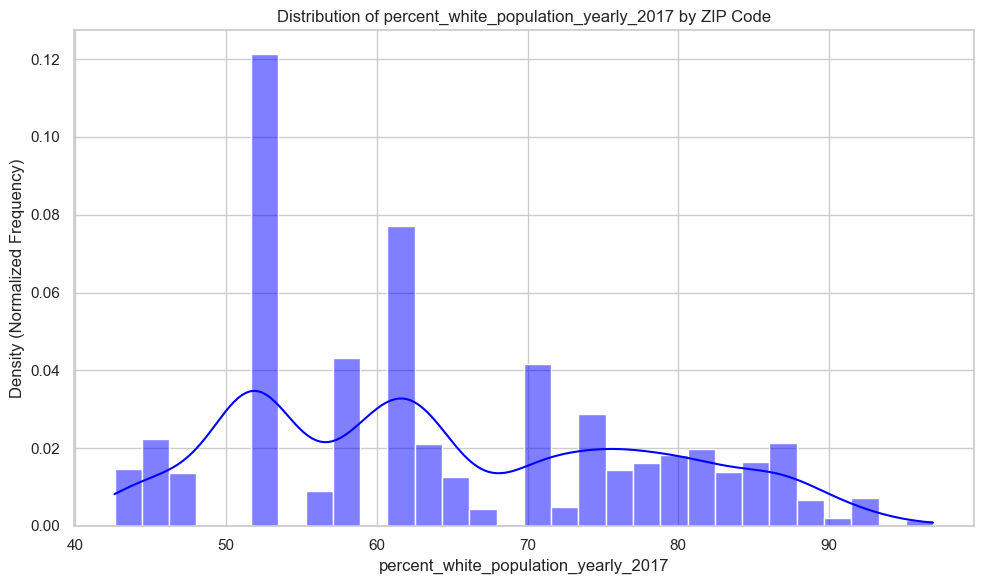

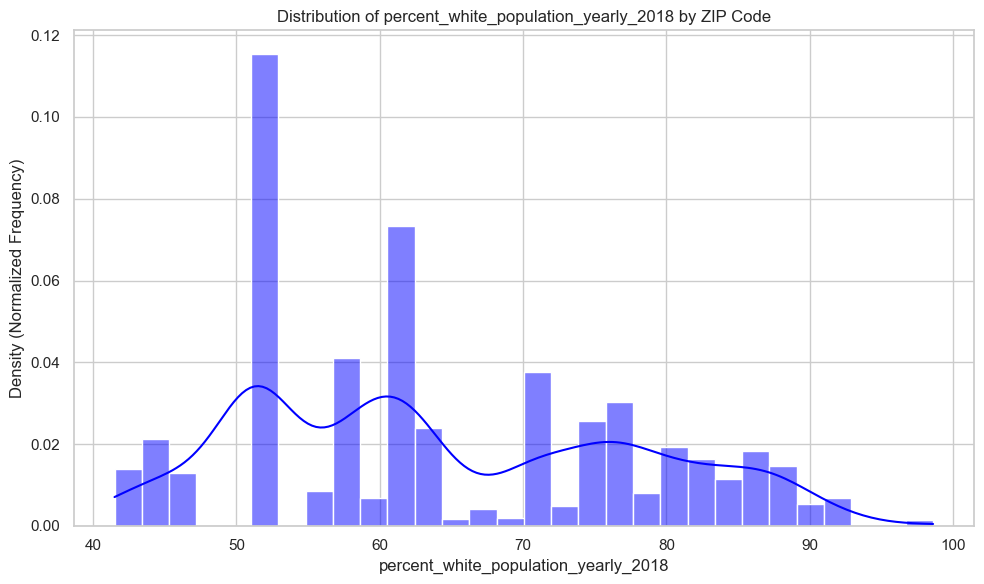

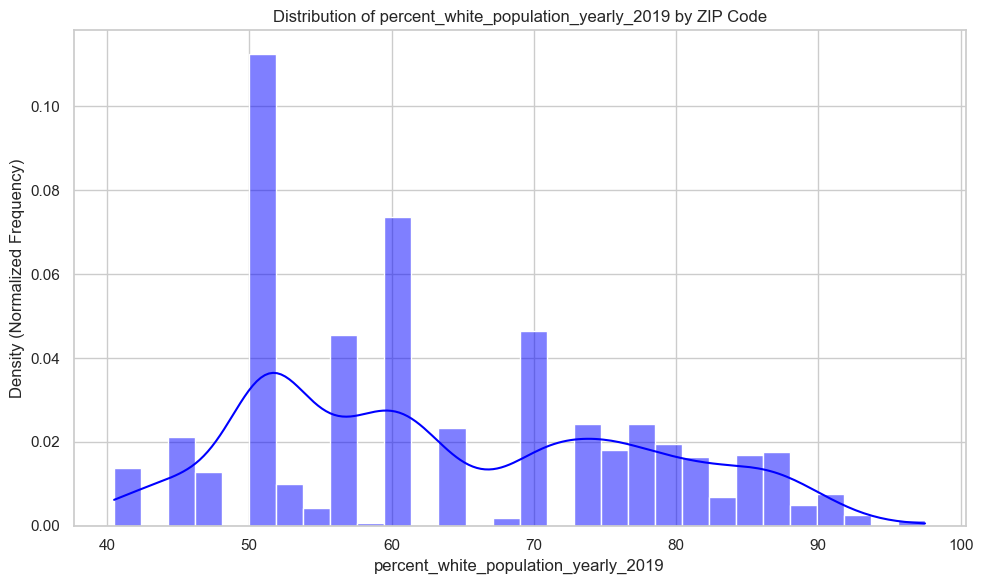

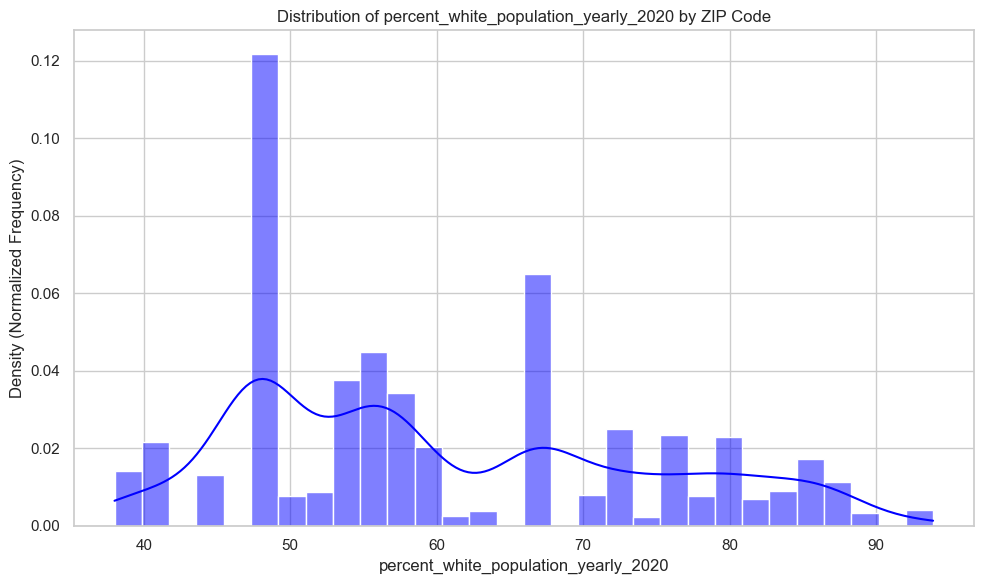

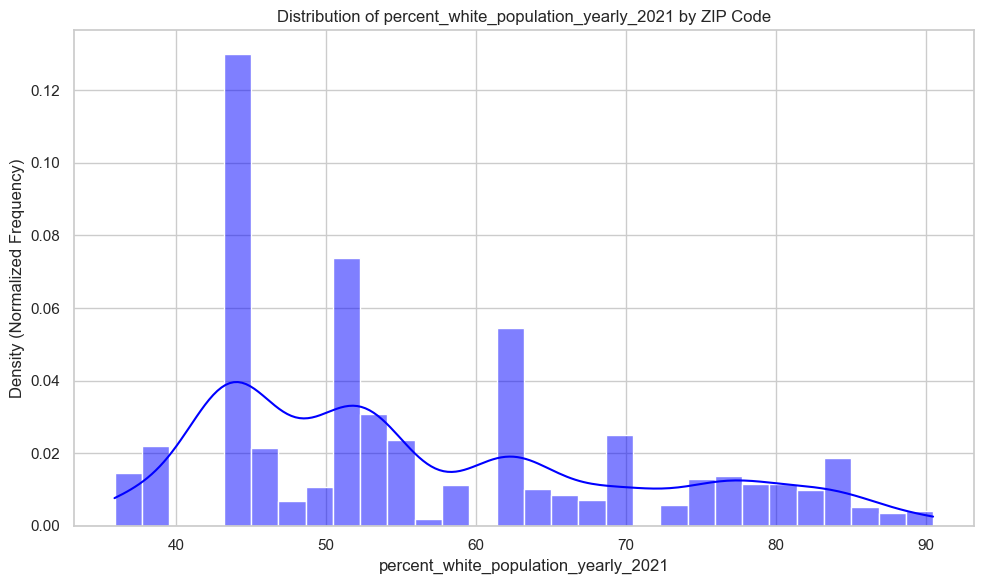

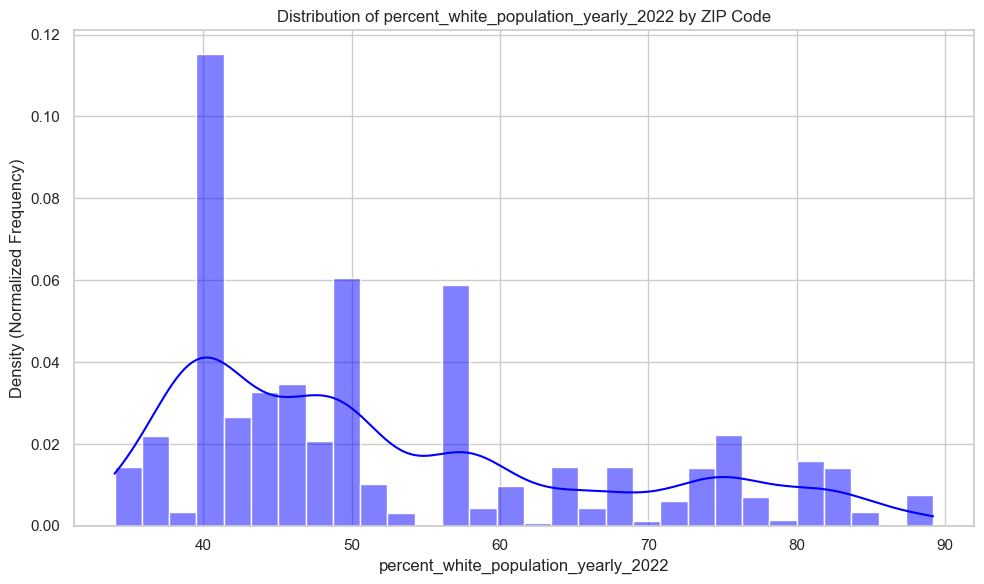

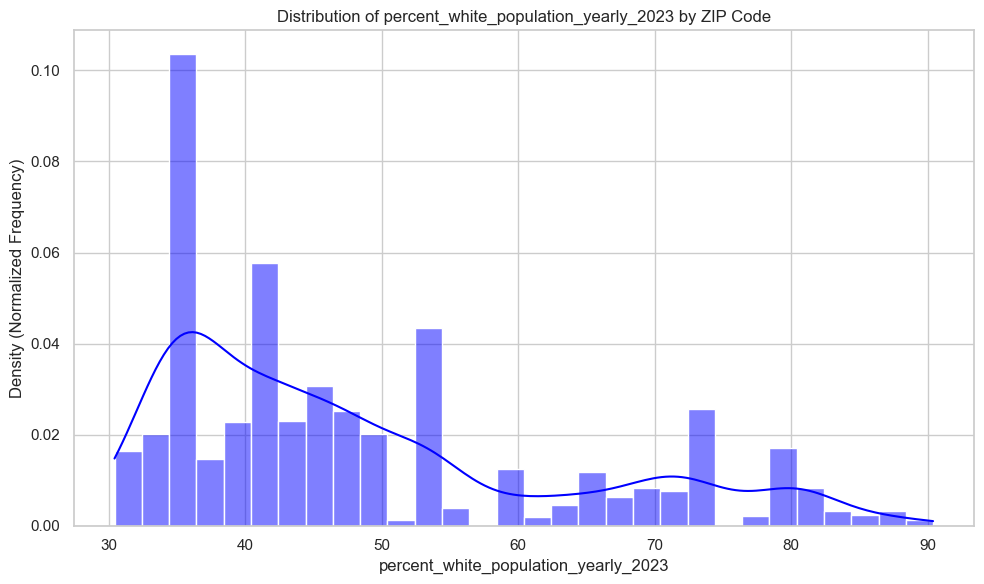

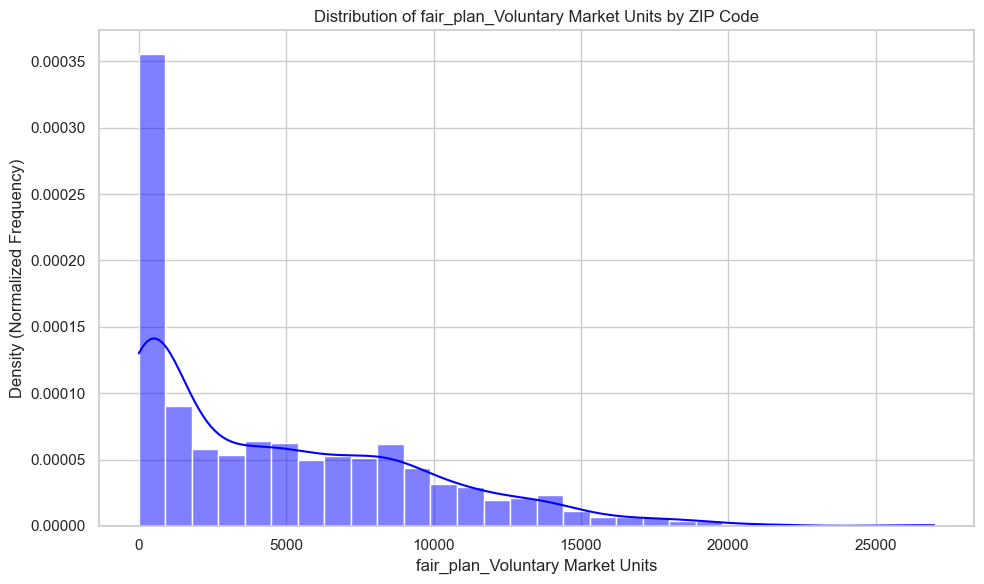

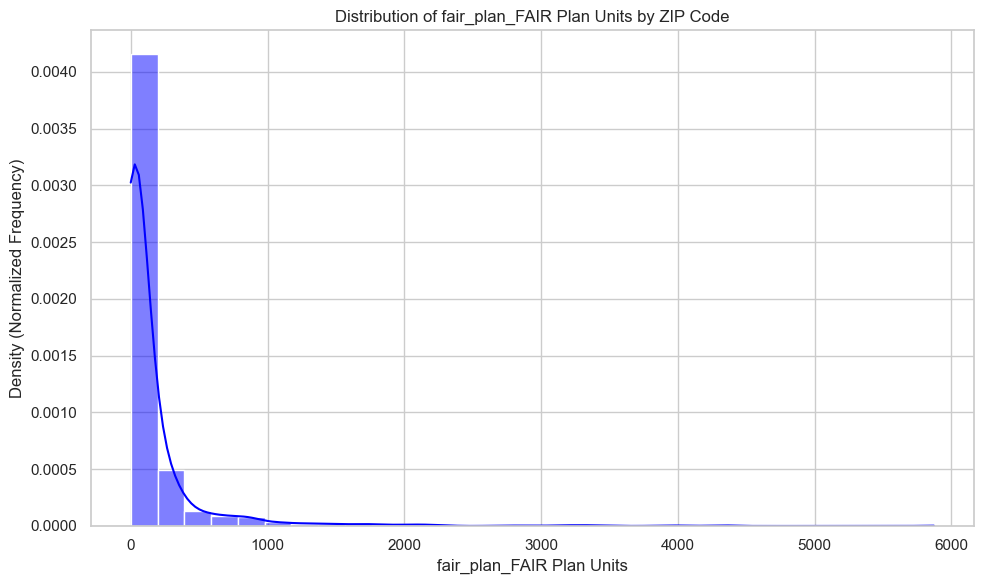

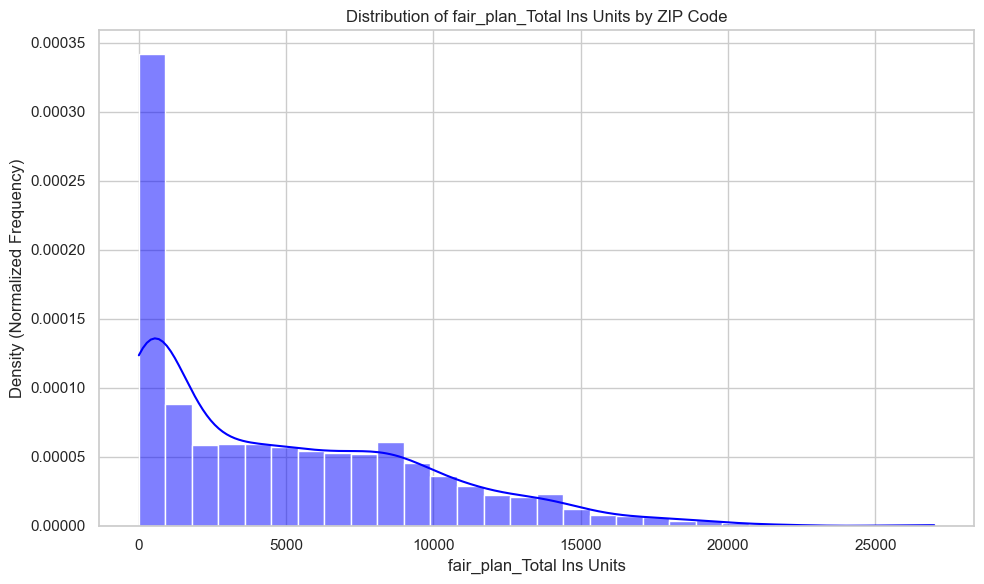

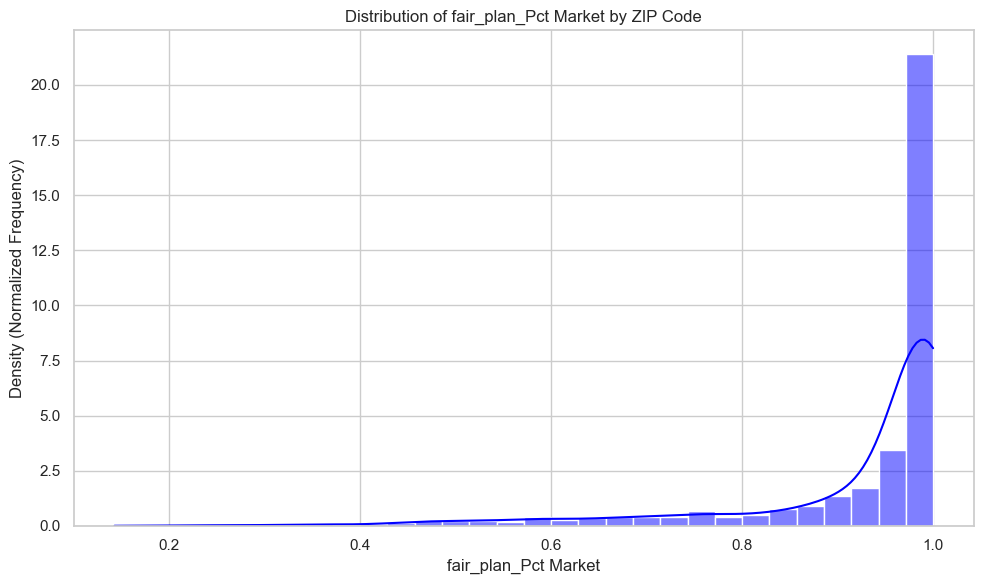

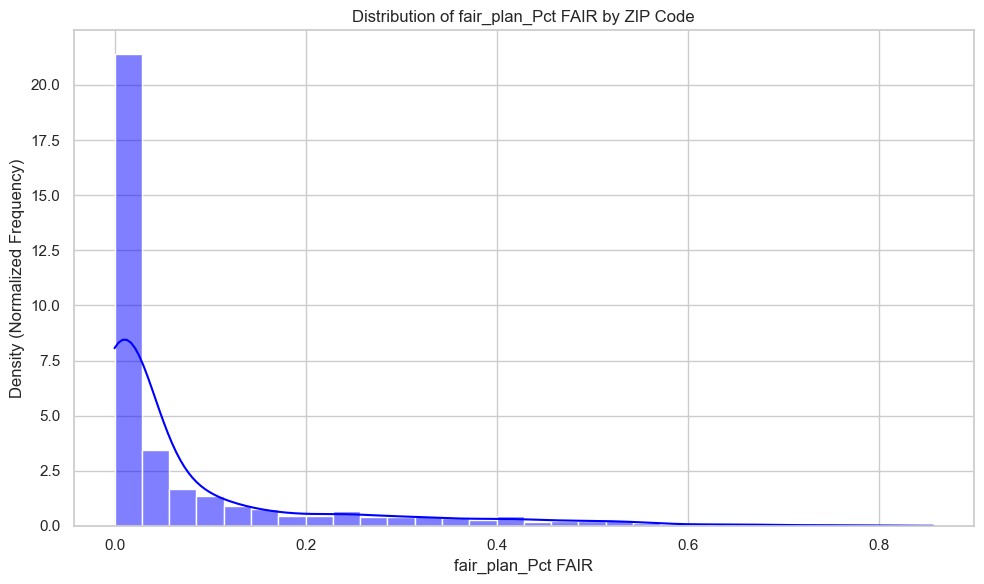

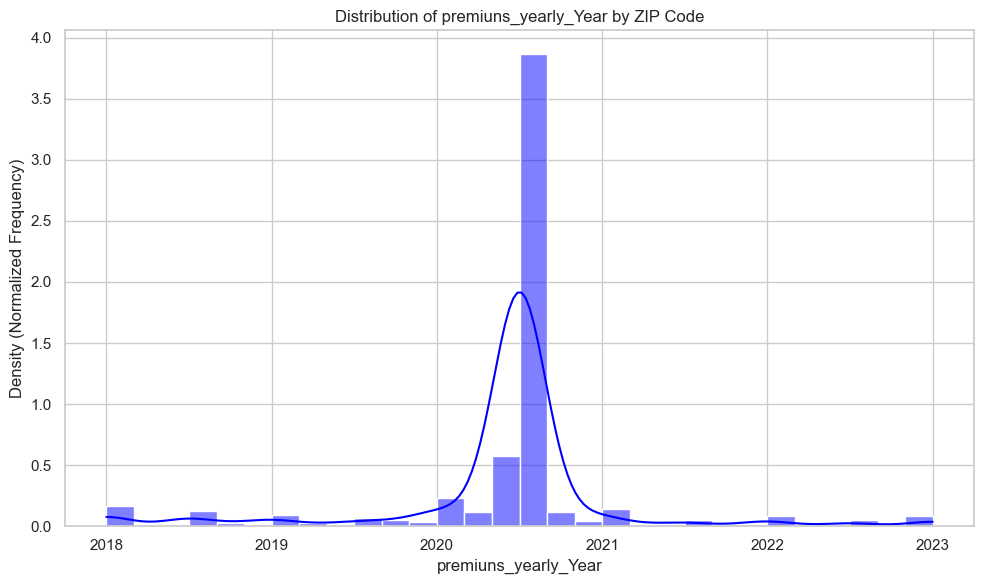

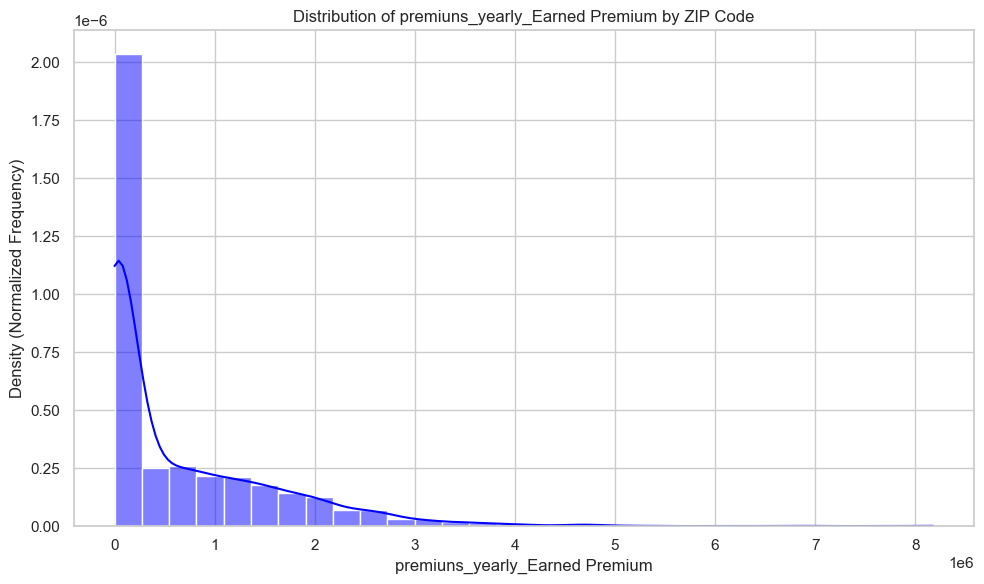

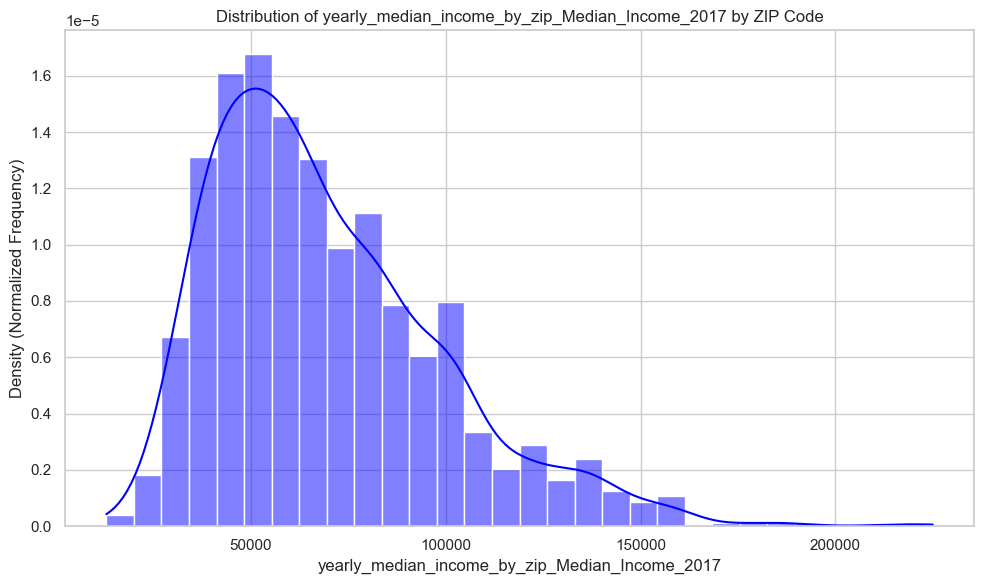

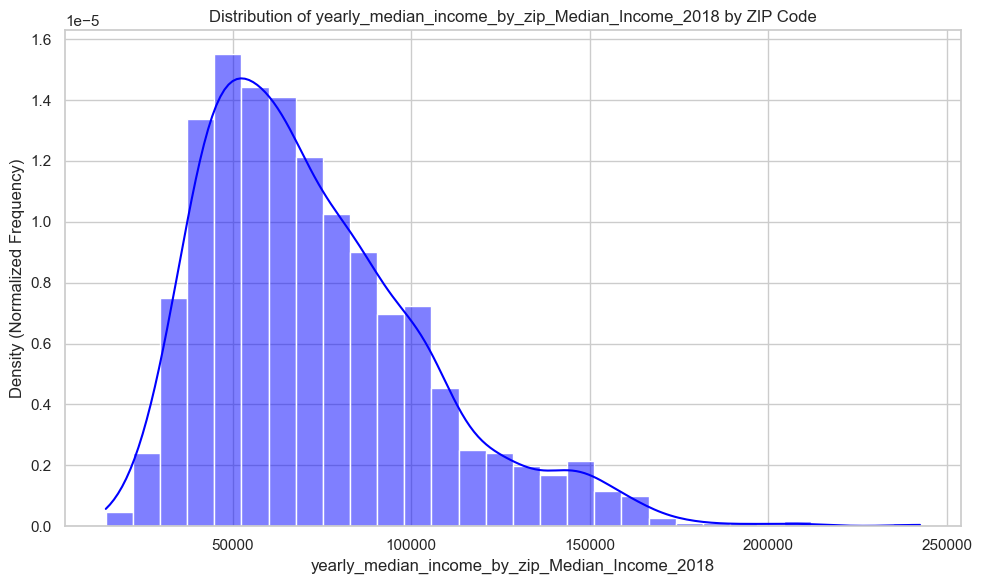

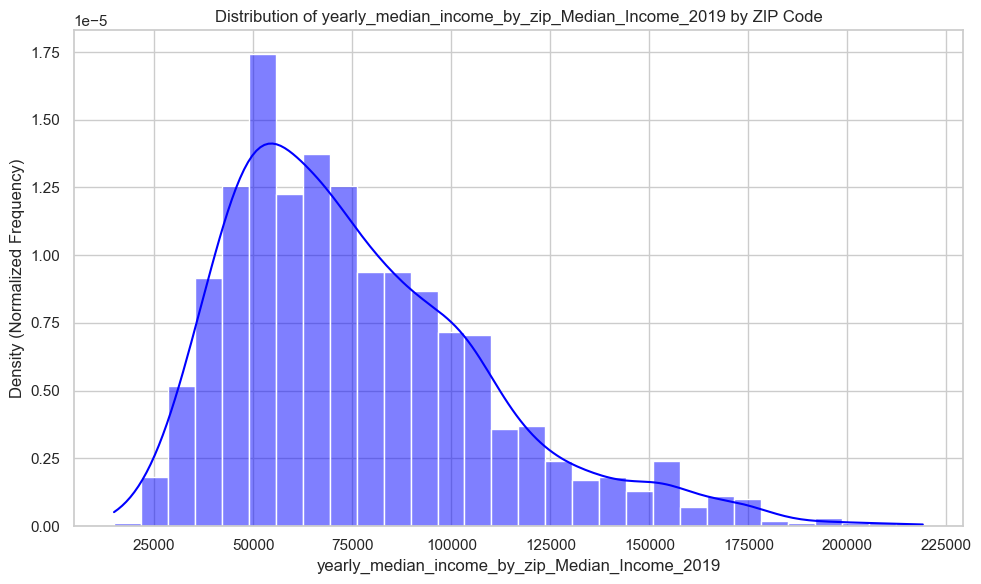

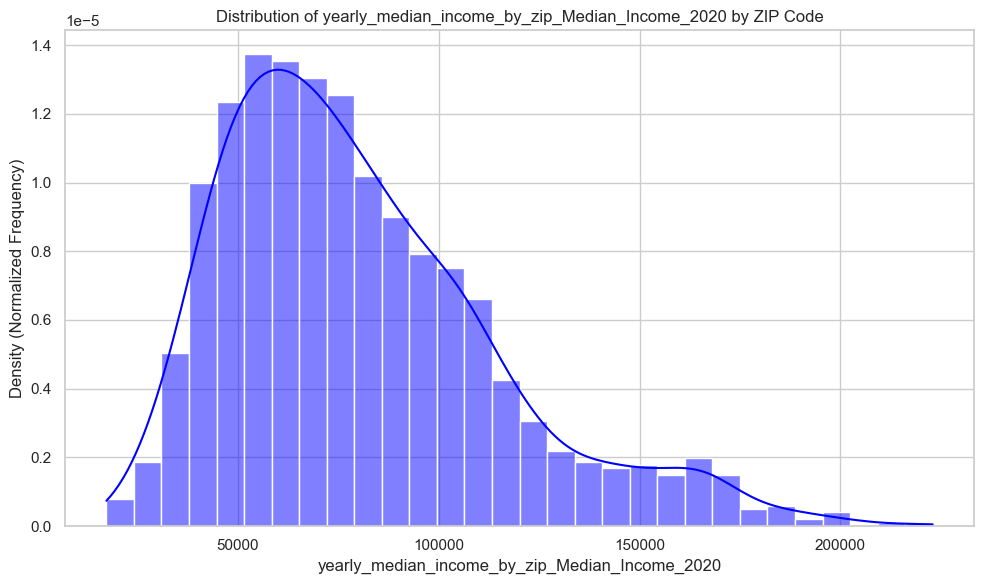

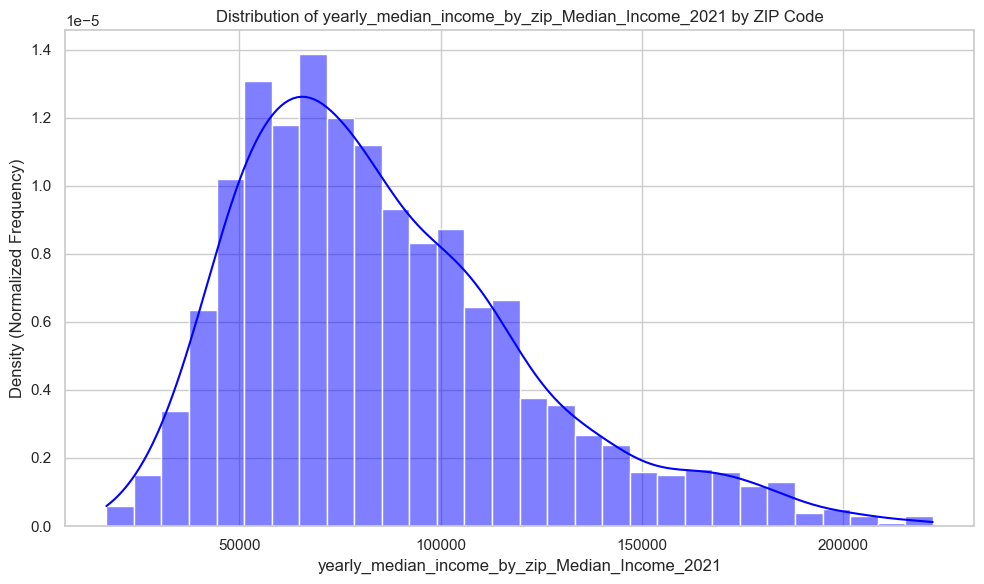

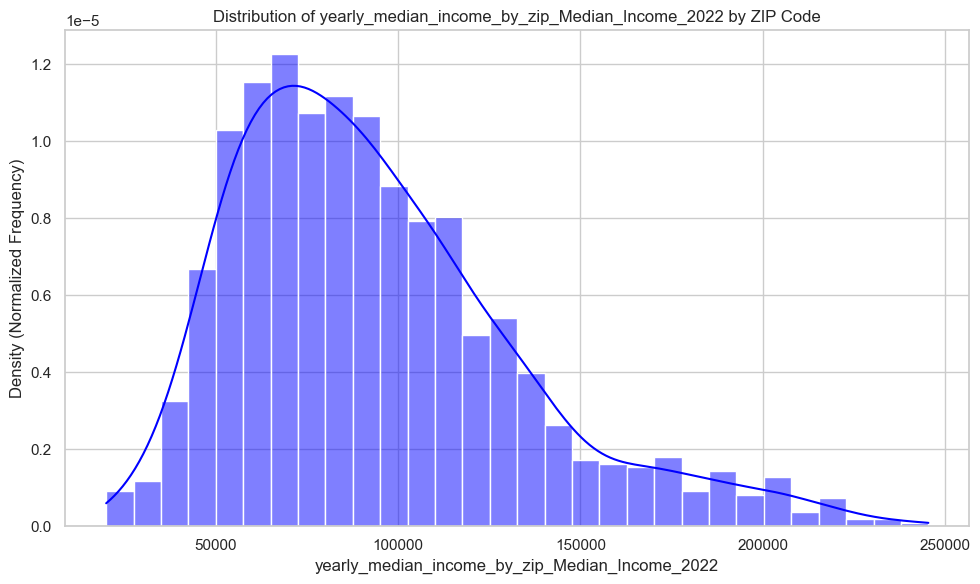

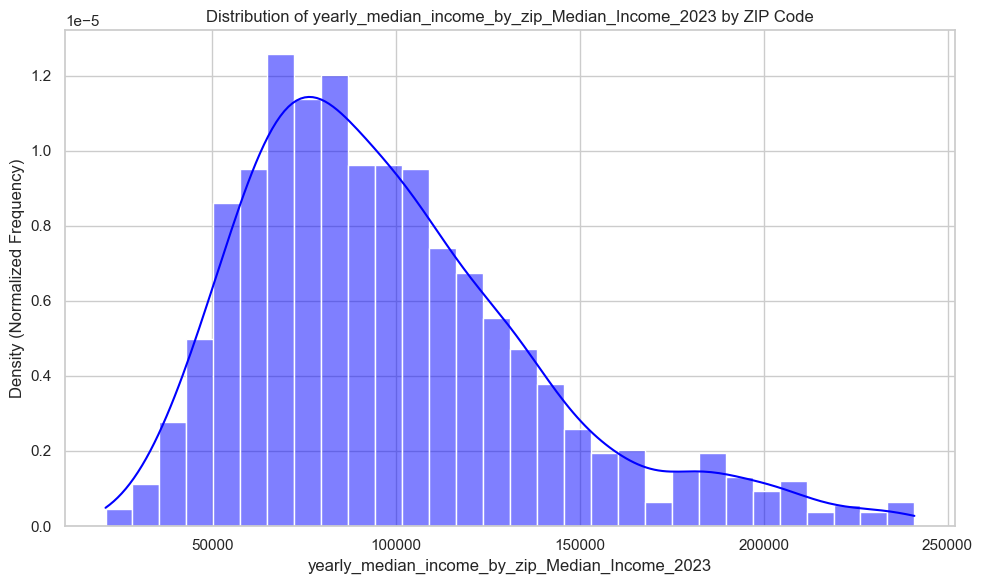

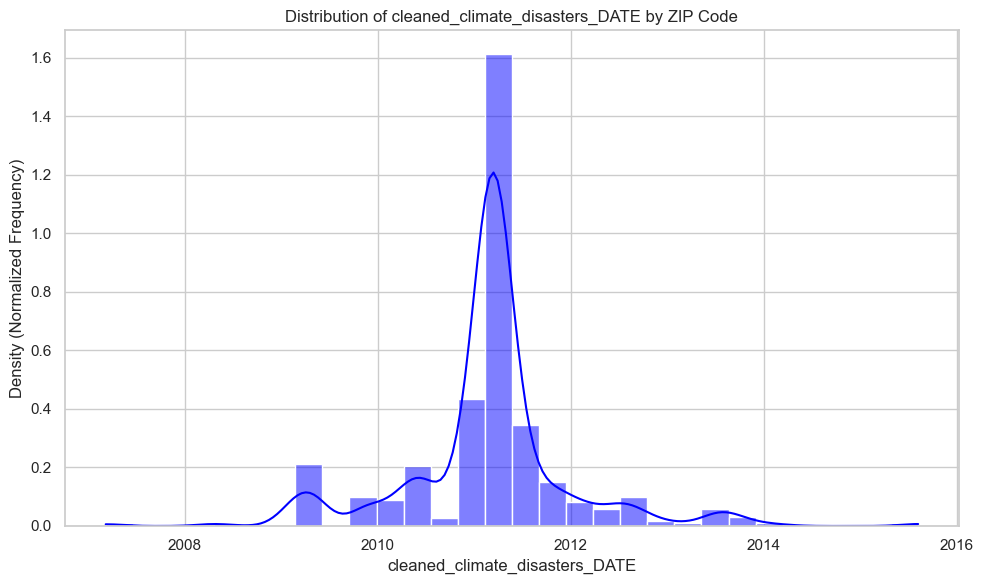

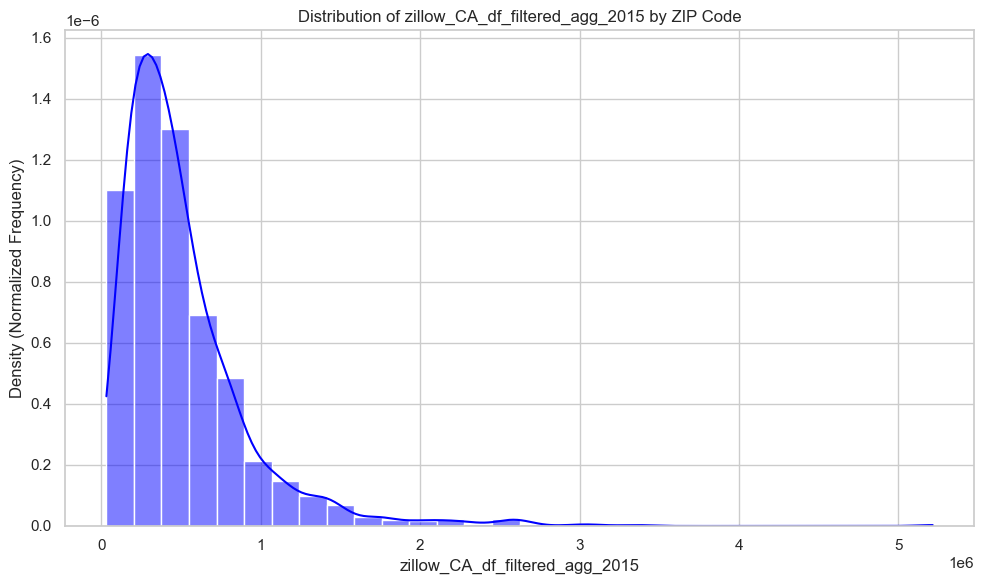

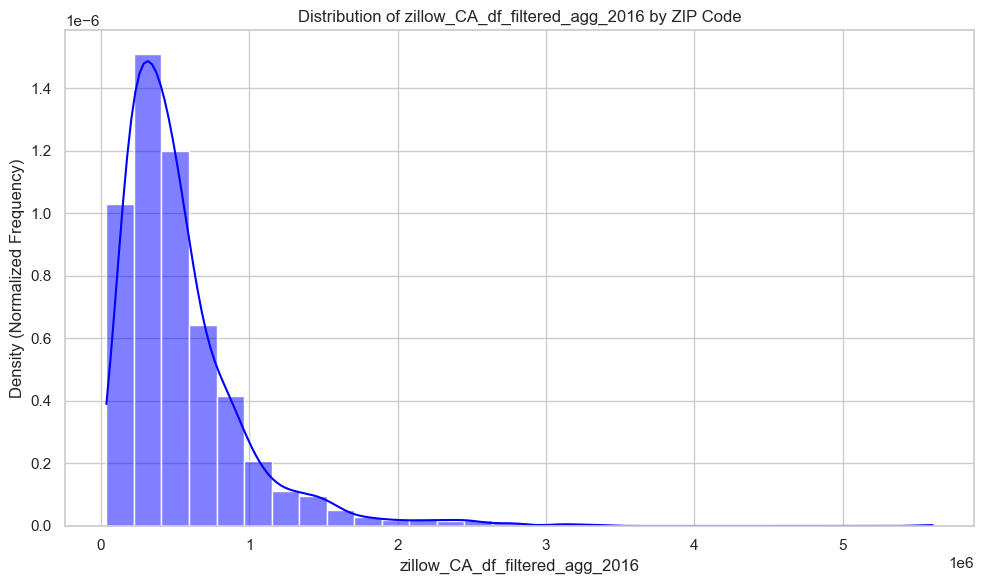

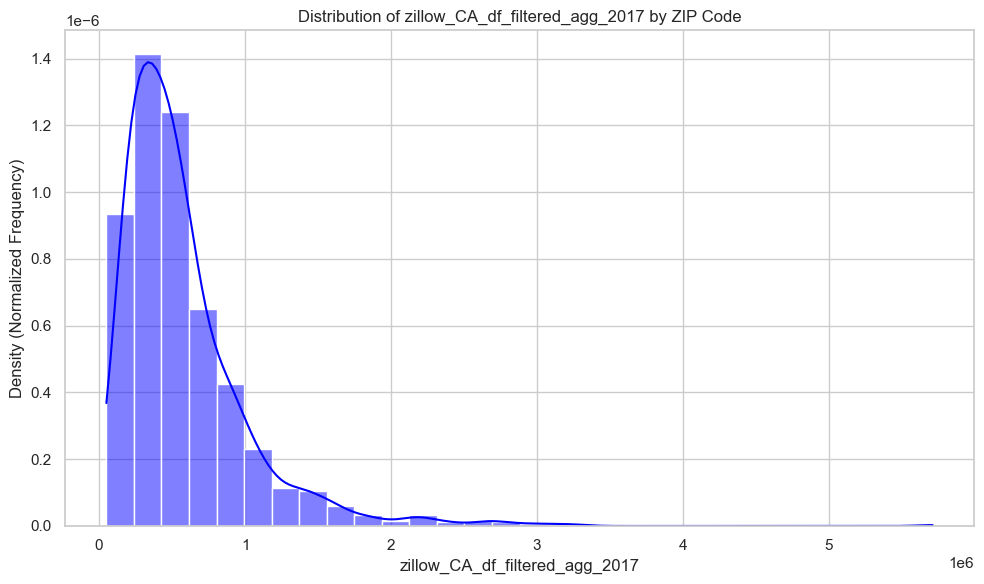

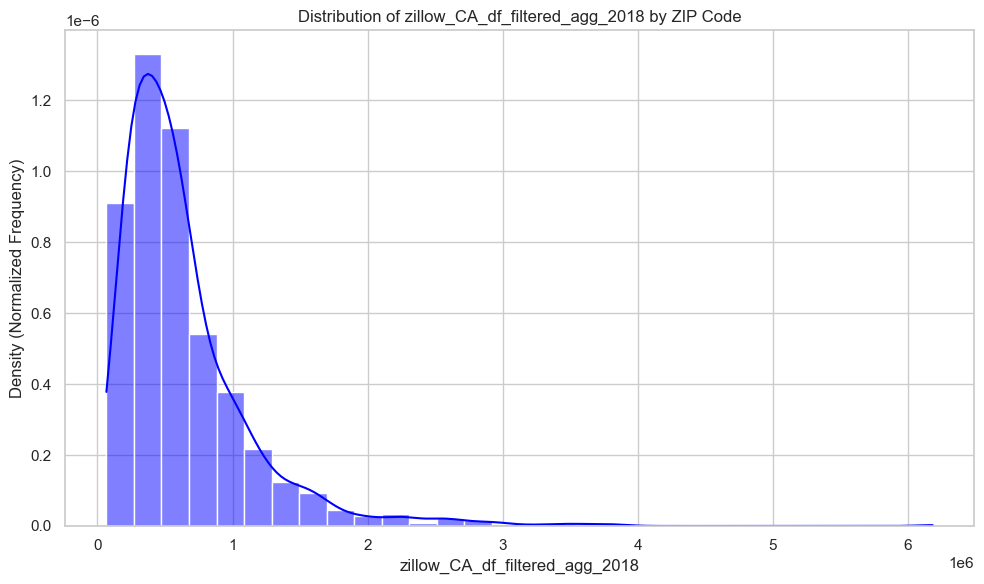

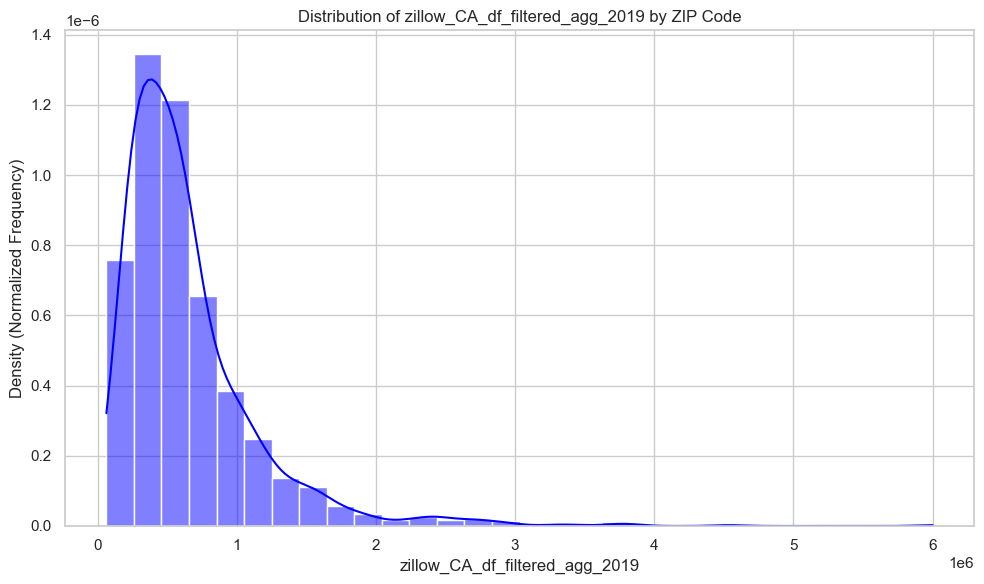

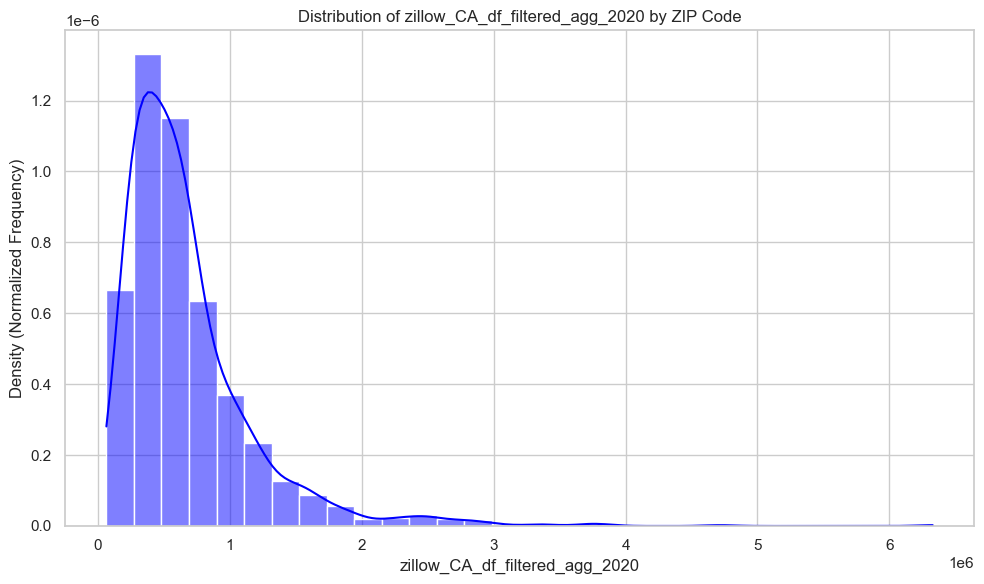

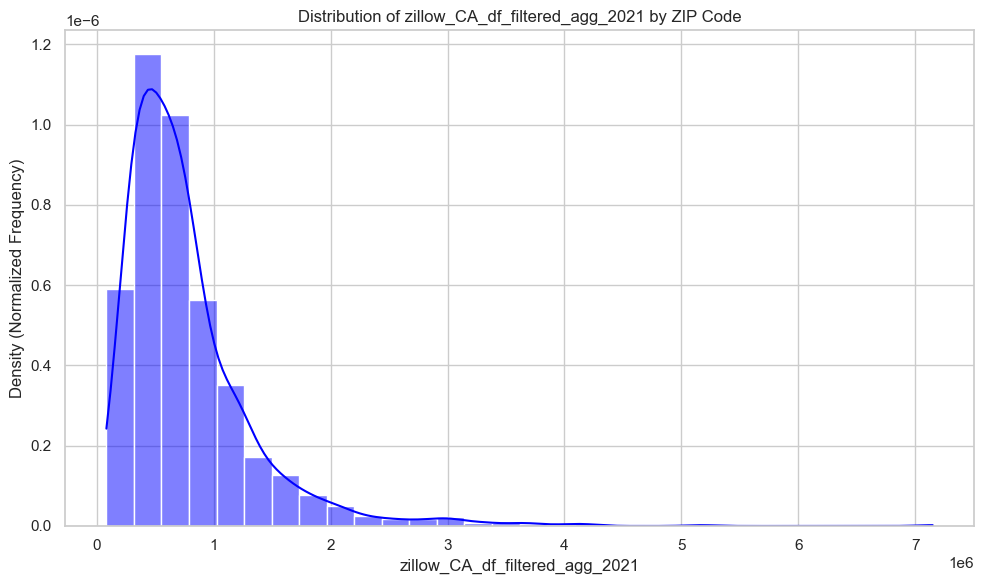

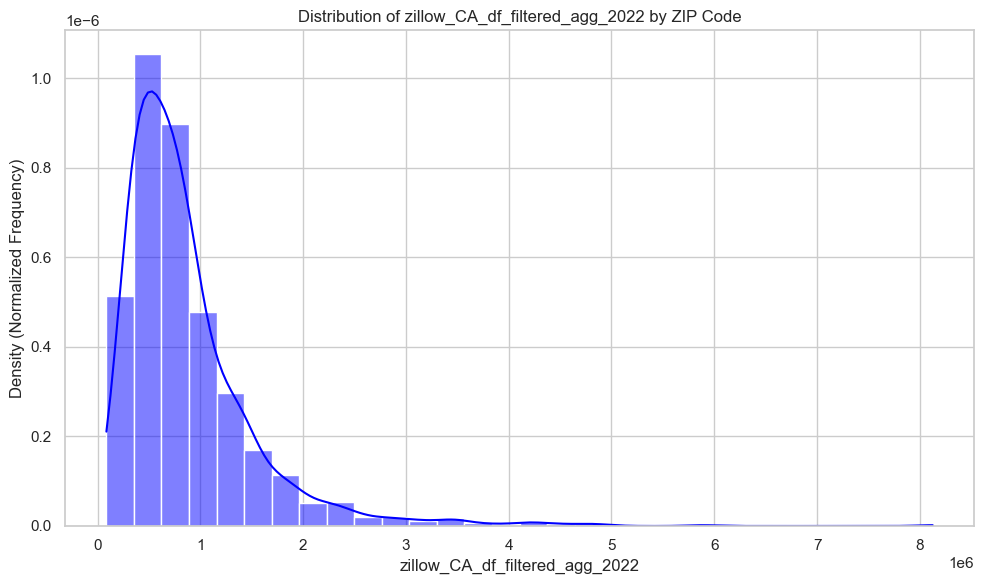

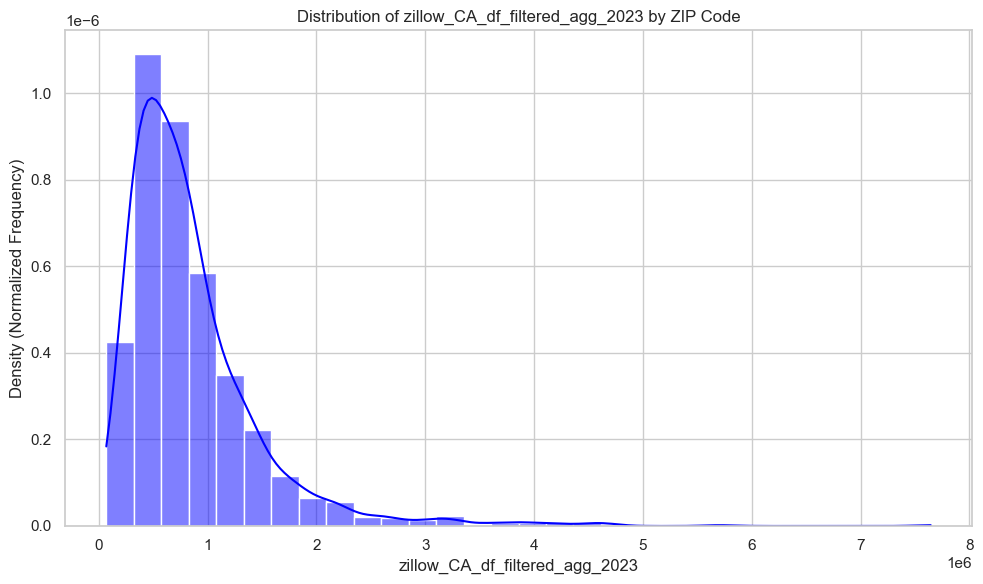

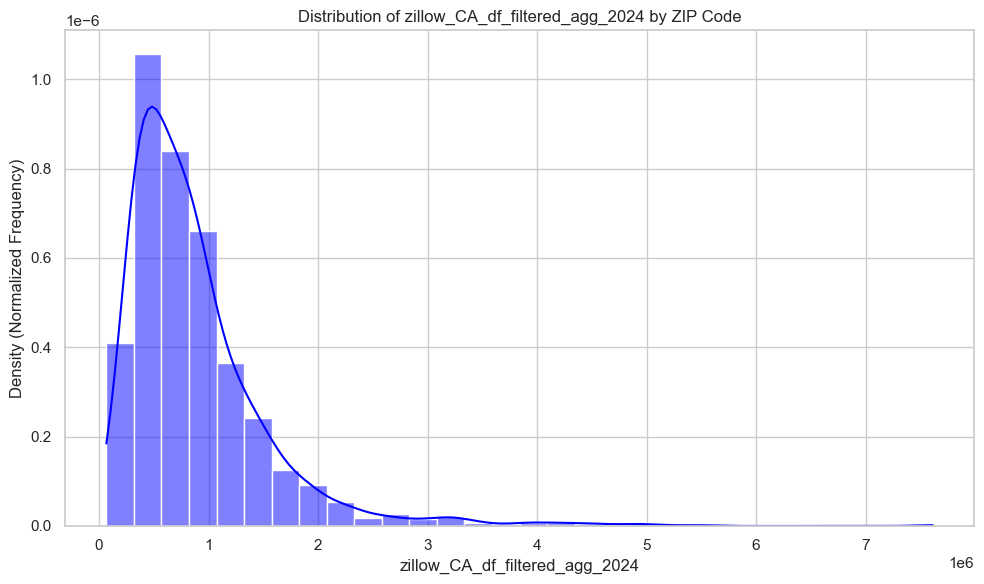

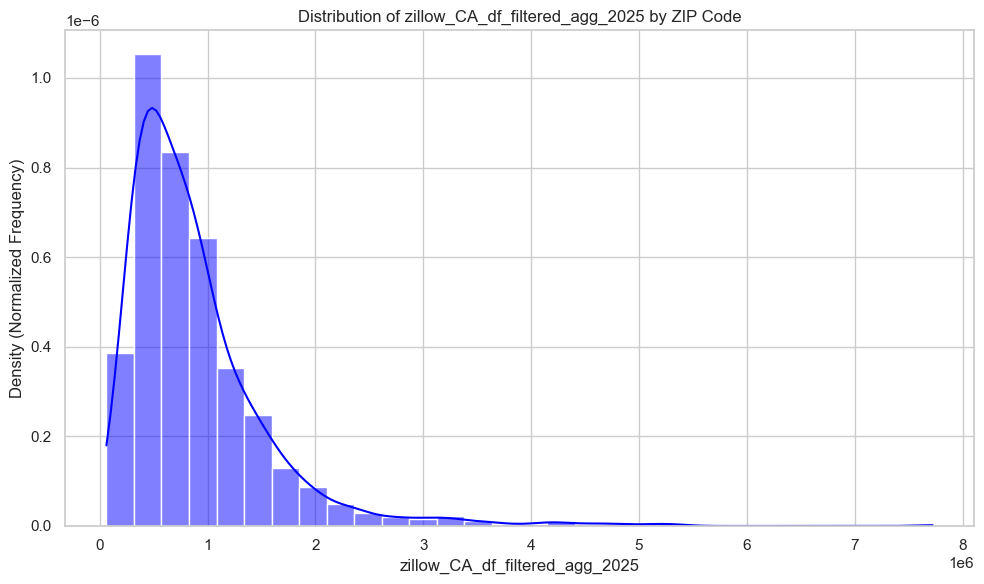

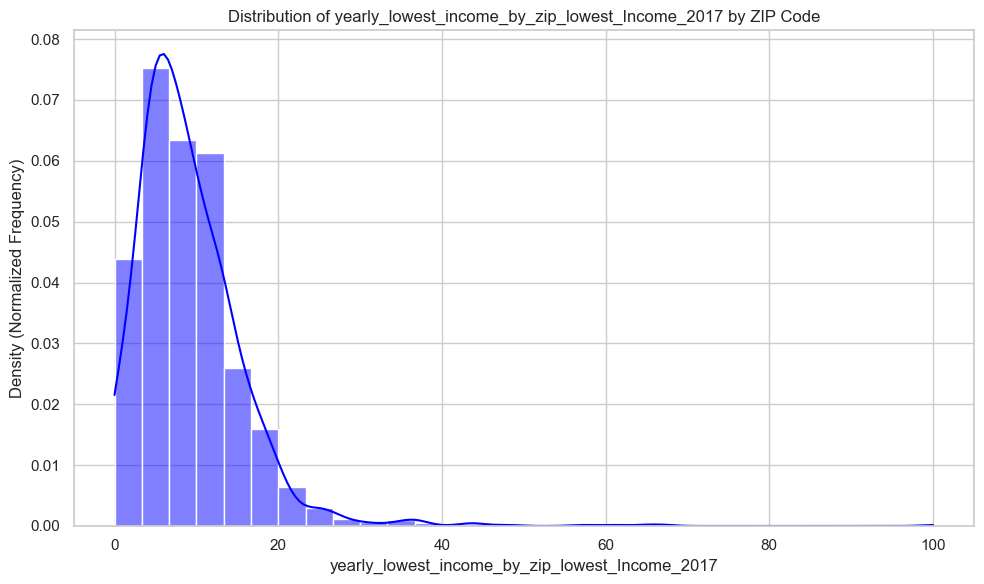

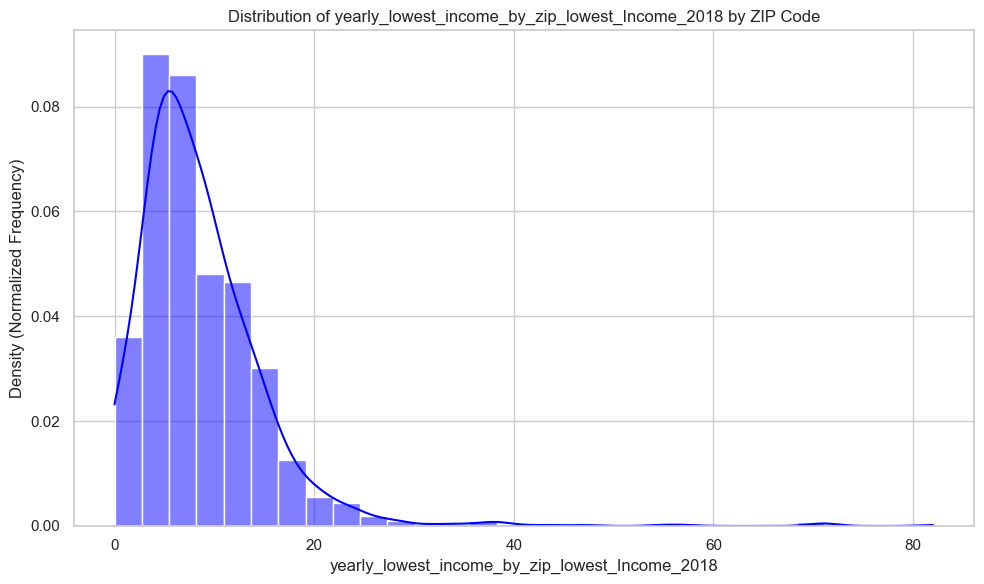

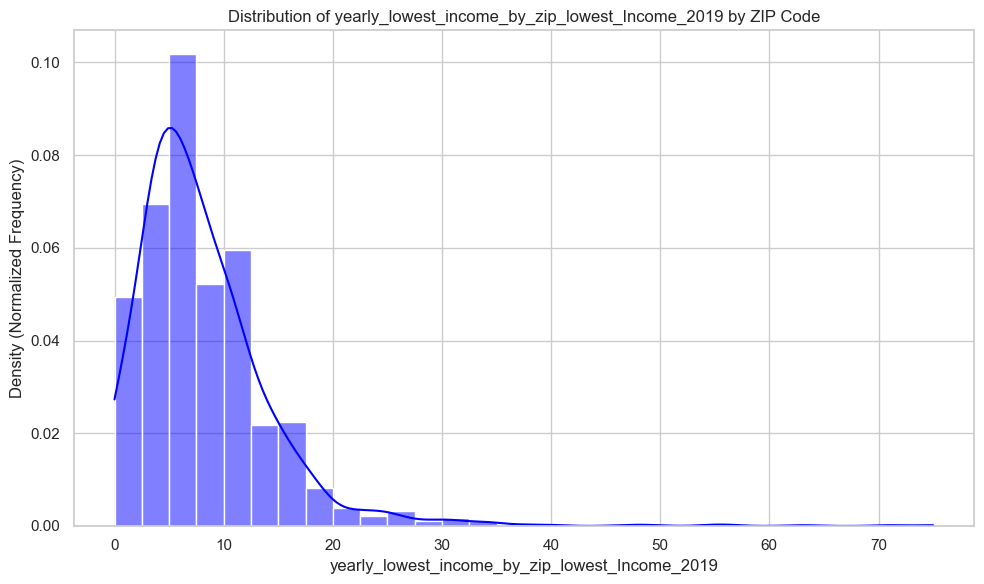

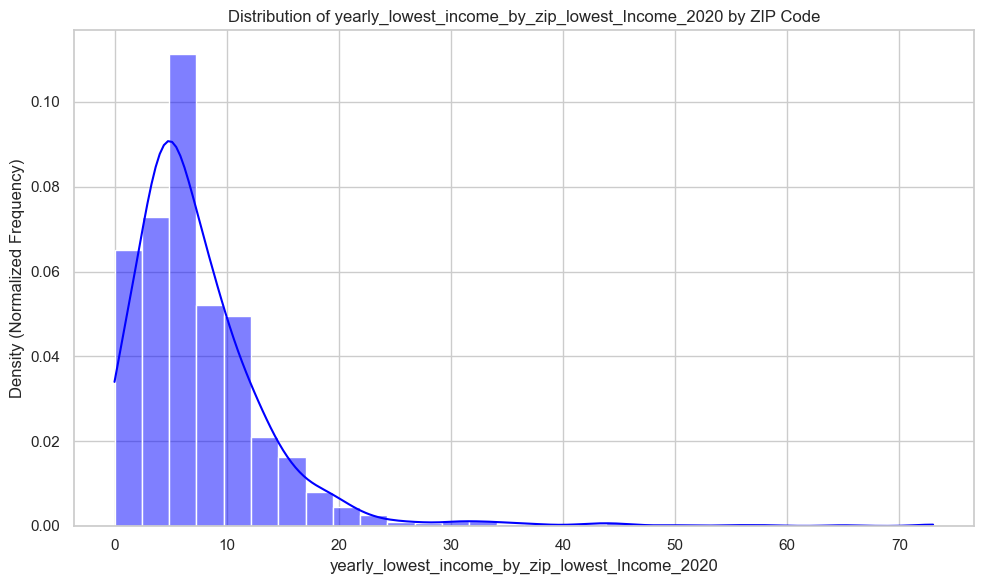

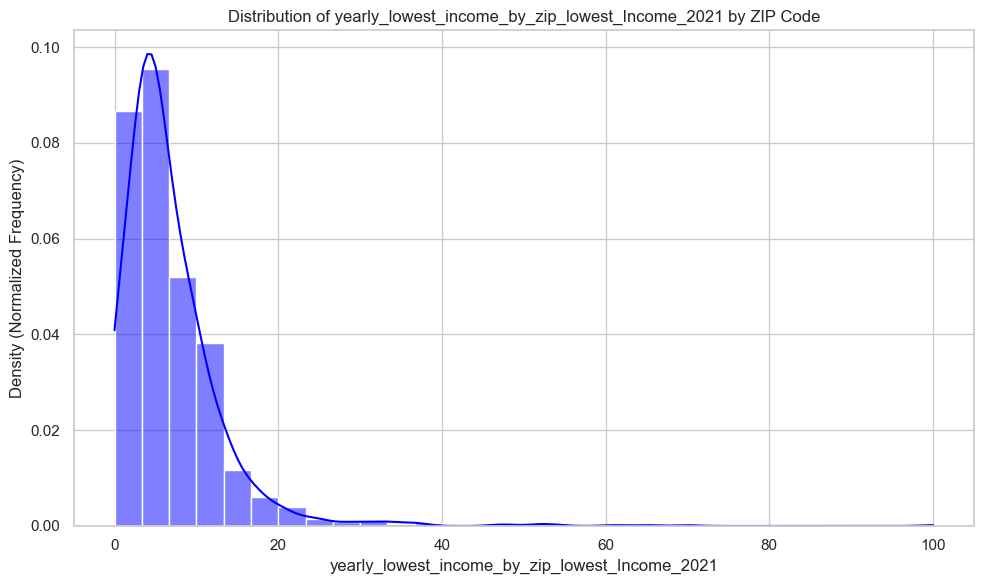

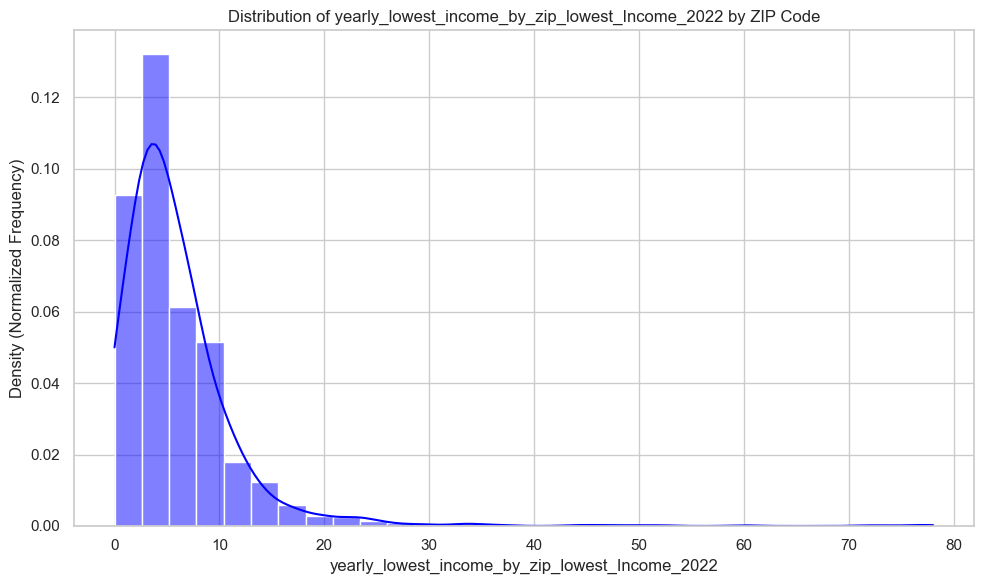

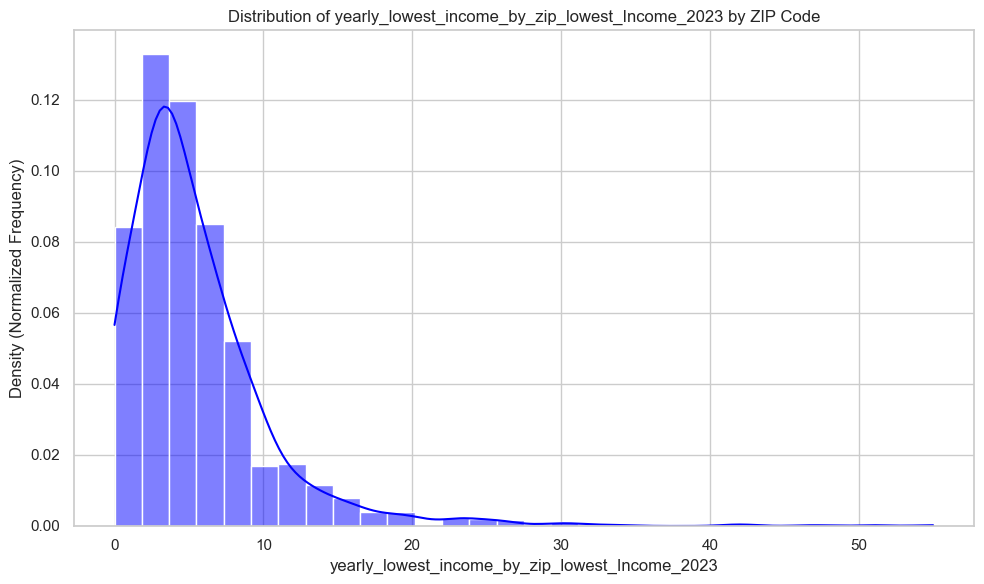

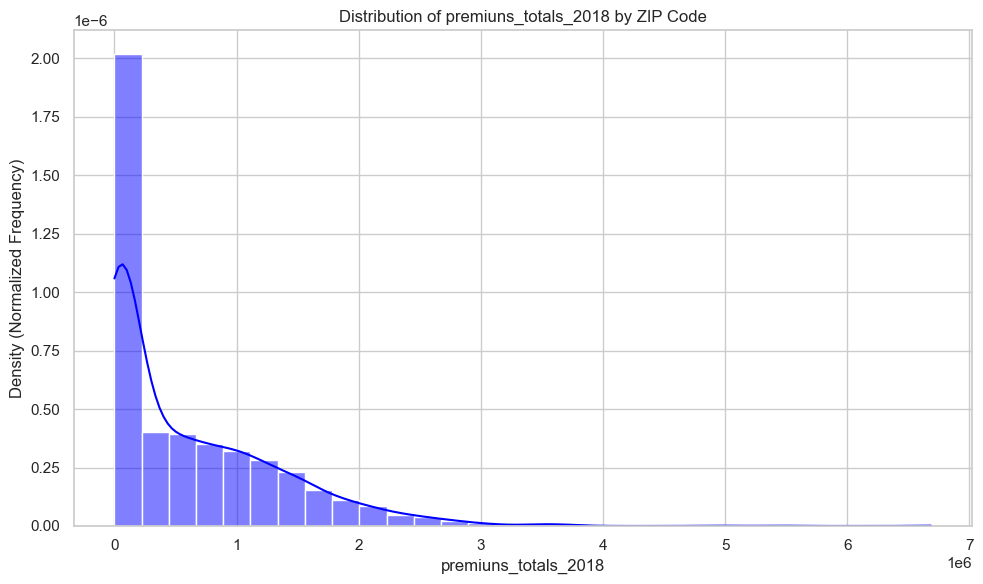

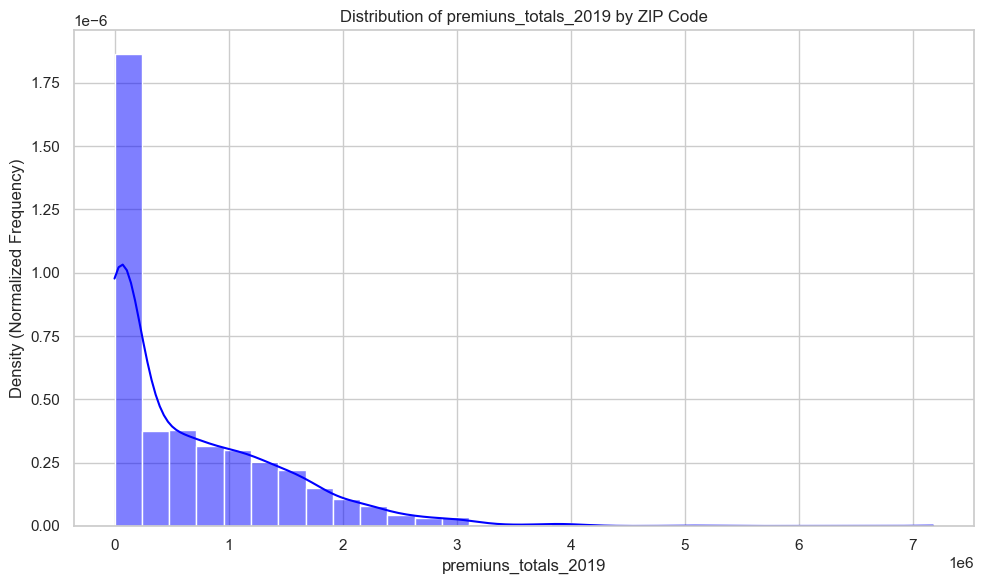

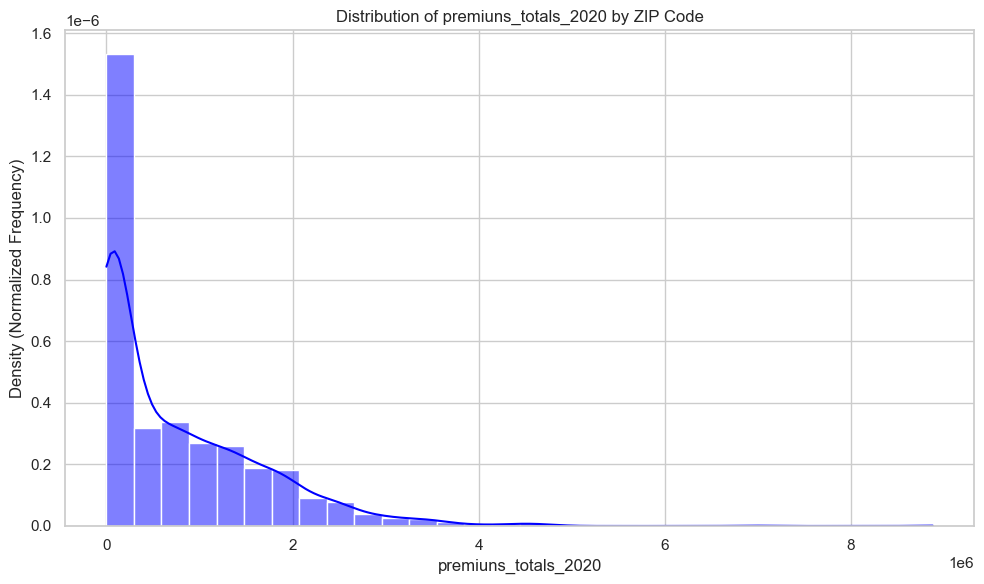

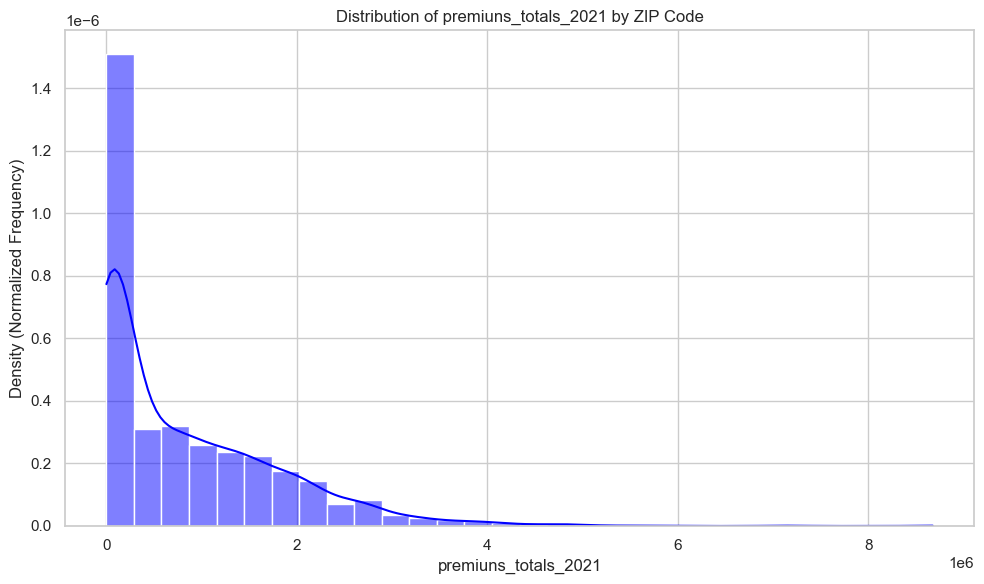

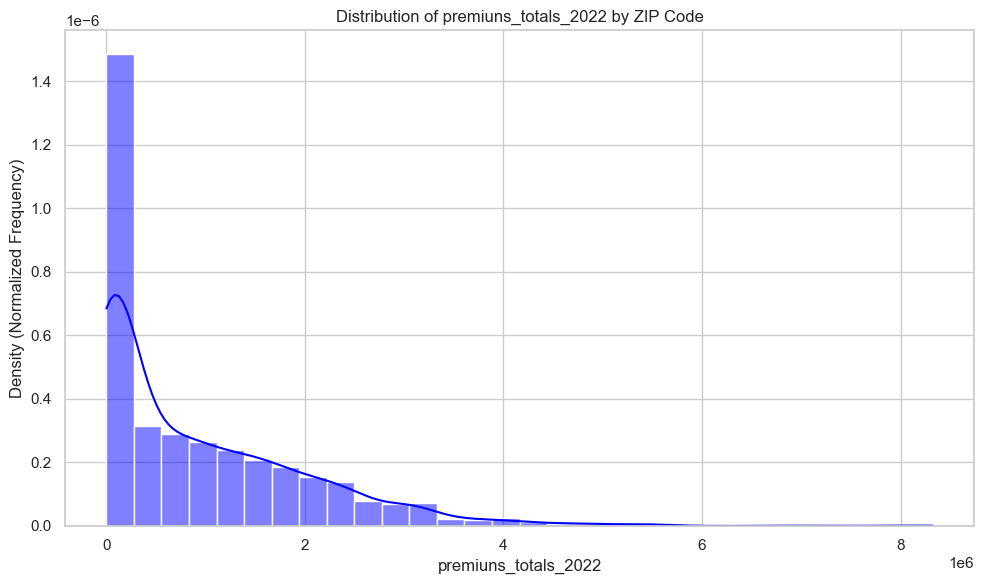

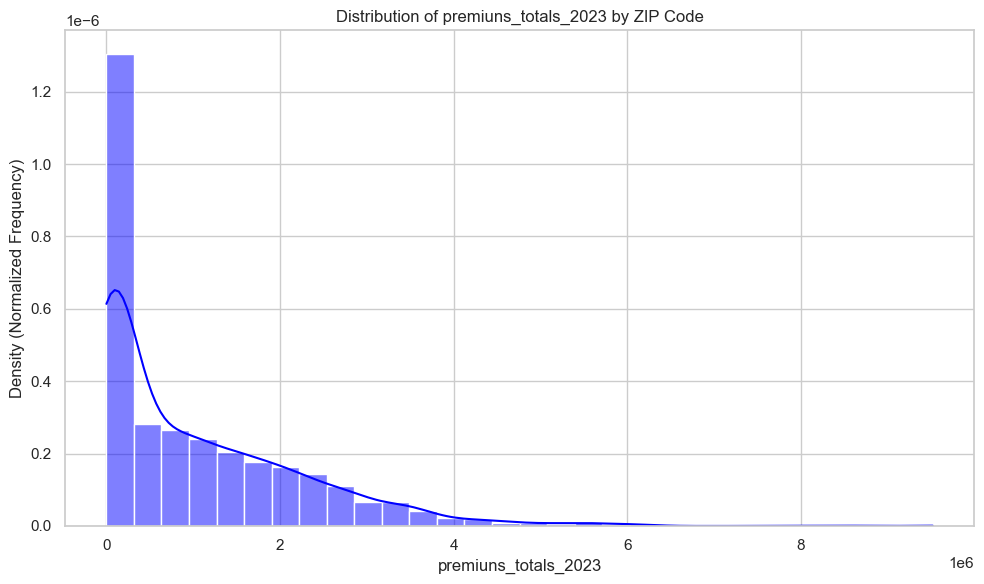

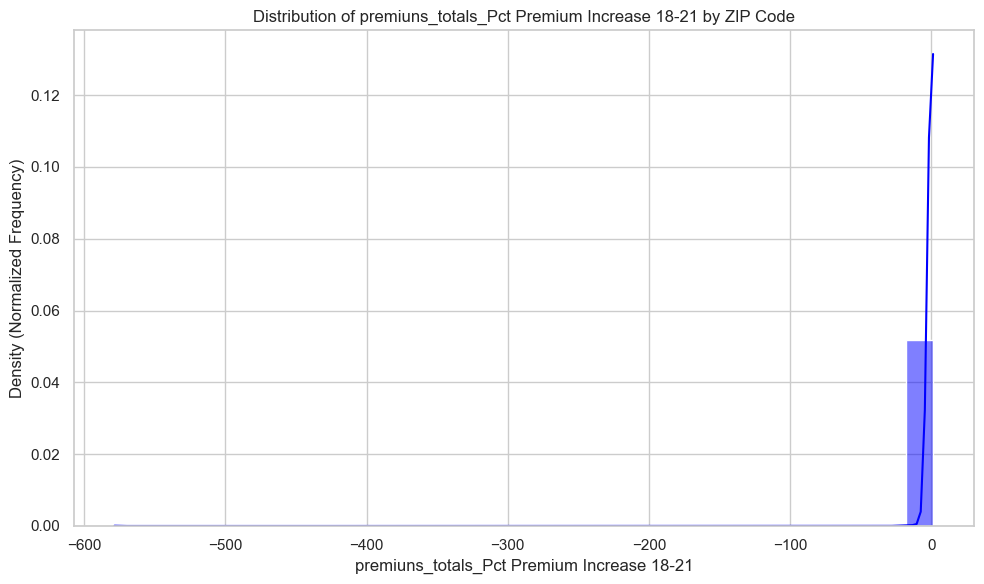

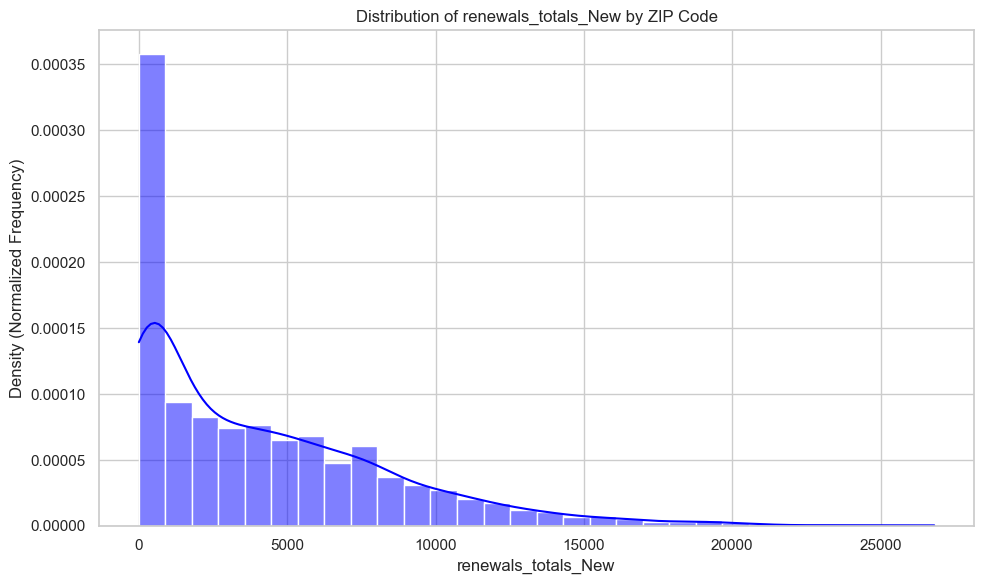

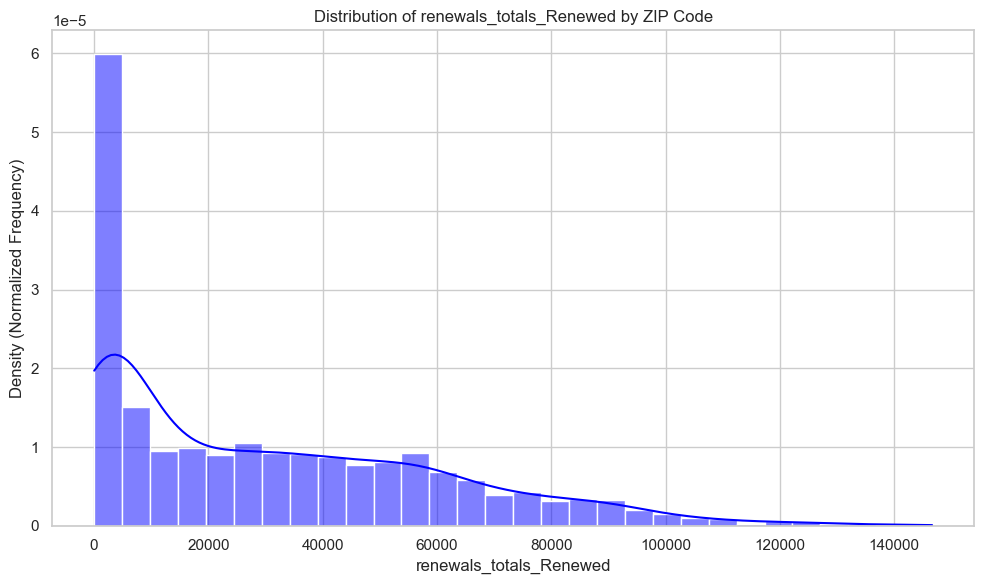

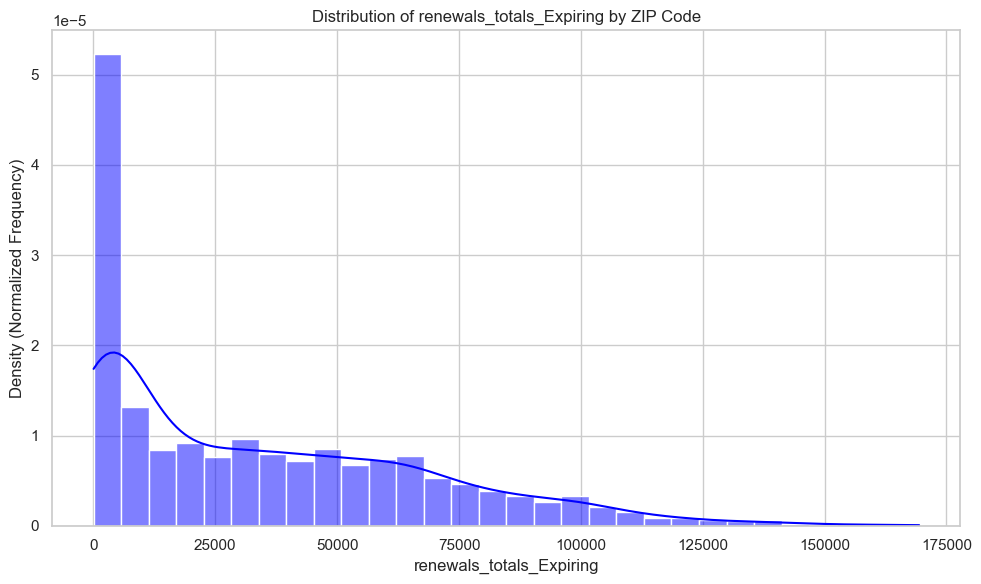

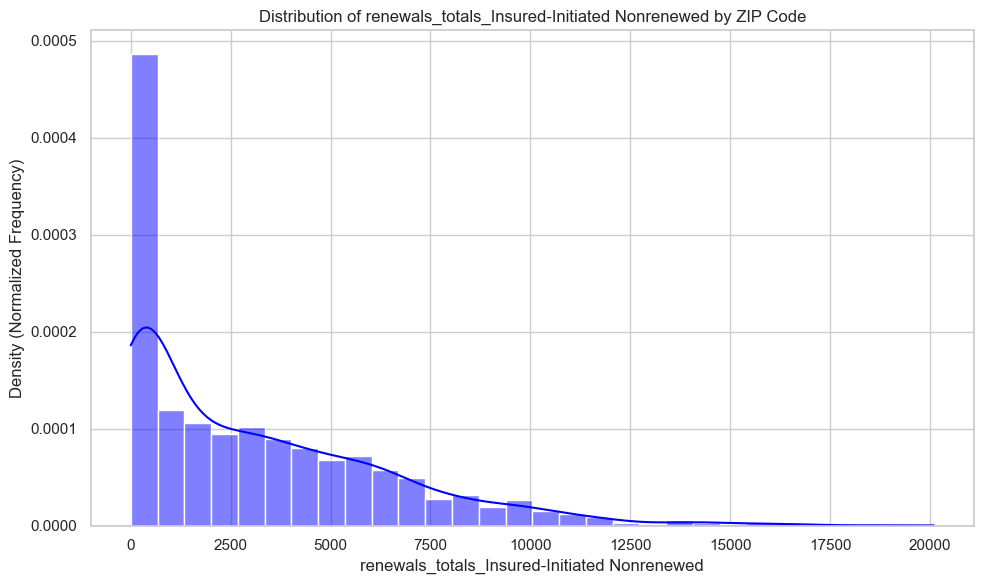

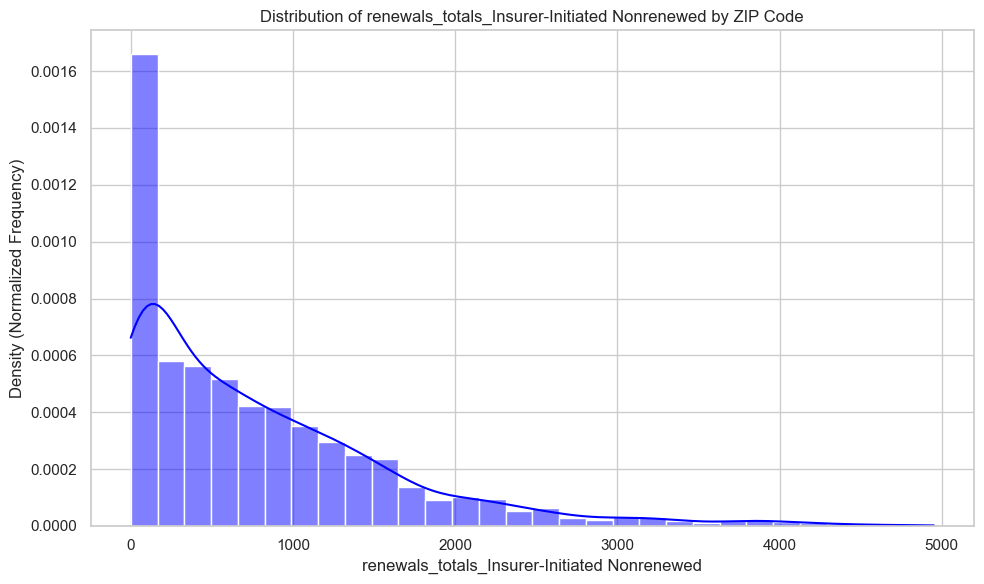

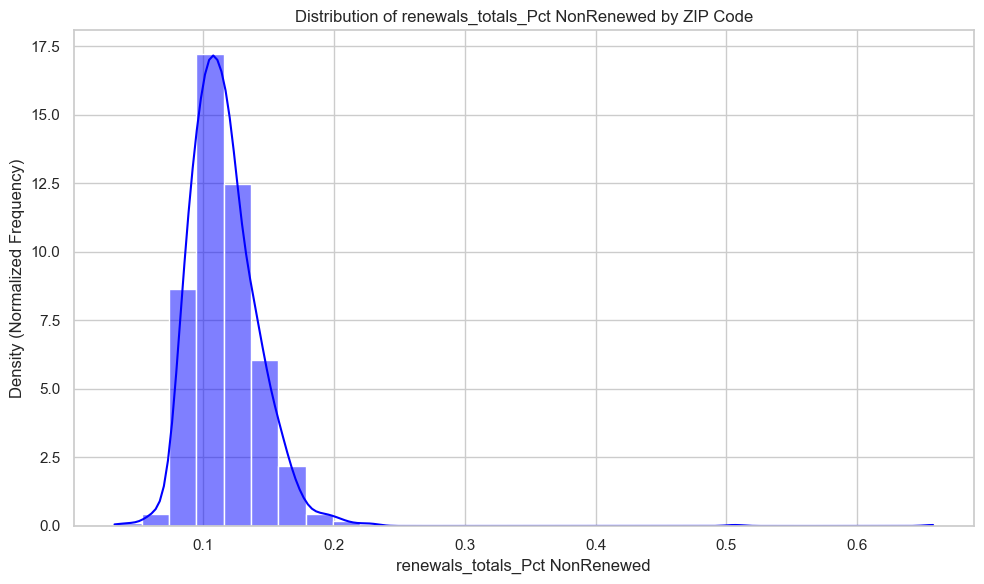

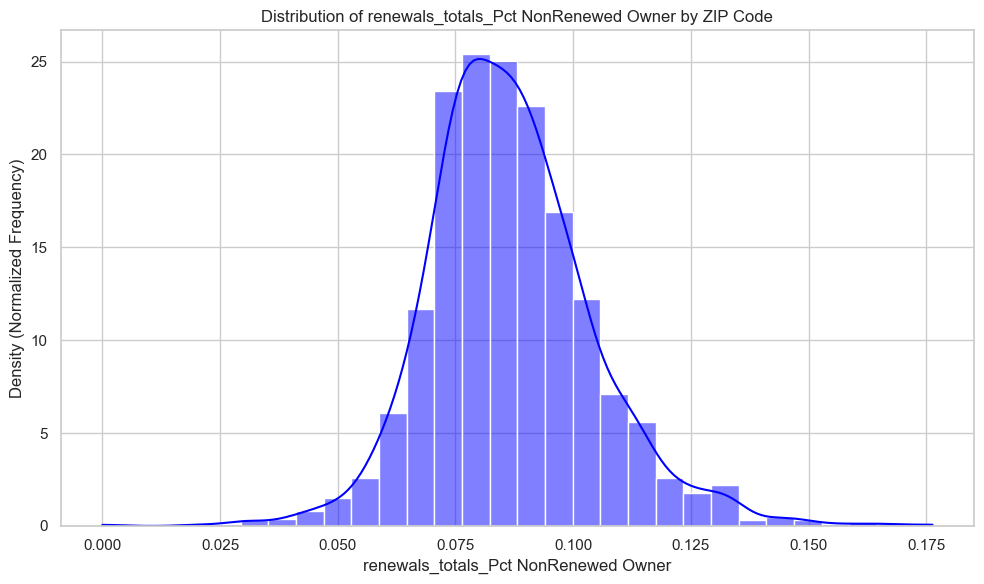

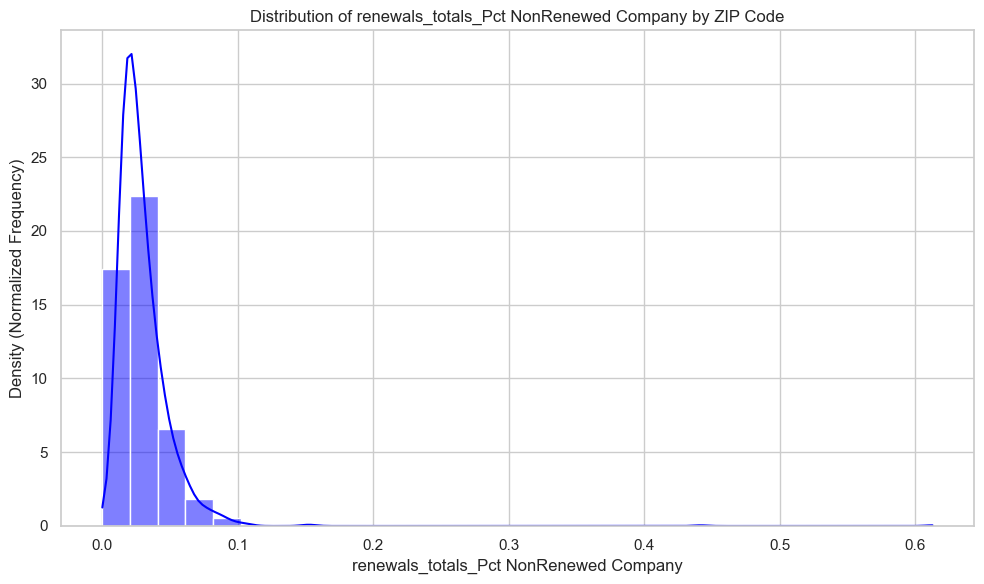

/var/folders/2y/clrtzxvn6c753s49pbsd5t_m0000gn/T/ipykernel_9951/2623890681.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[variable].value_counts().index, y=data[variable].value_counts().values, palette='viridis')


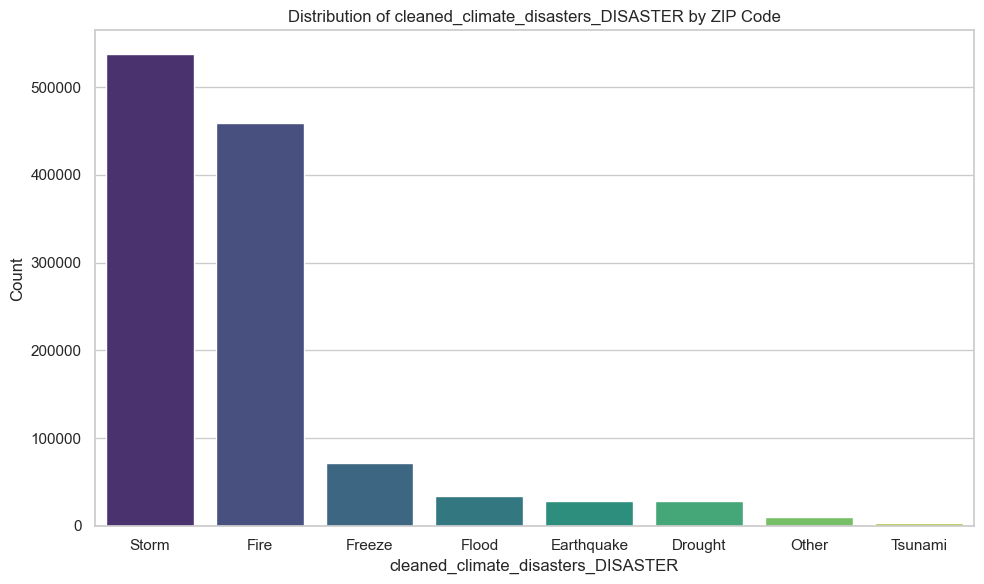

/var/folders/2y/clrtzxvn6c753s49pbsd5t_m0000gn/T/ipykernel_9951/2623890681.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[variable].value_counts().index, y=data[variable].value_counts().values, palette='viridis')


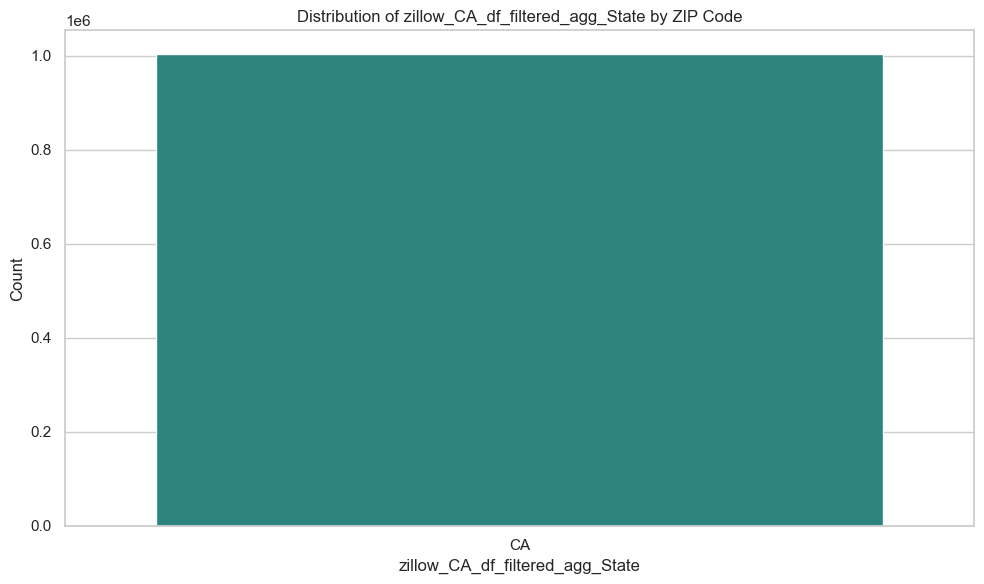

/var/folders/2y/clrtzxvn6c753s49pbsd5t_m0000gn/T/ipykernel_9951/2623890681.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[variable].value_counts().index, y=data[variable].value_counts().values, palette='viridis')


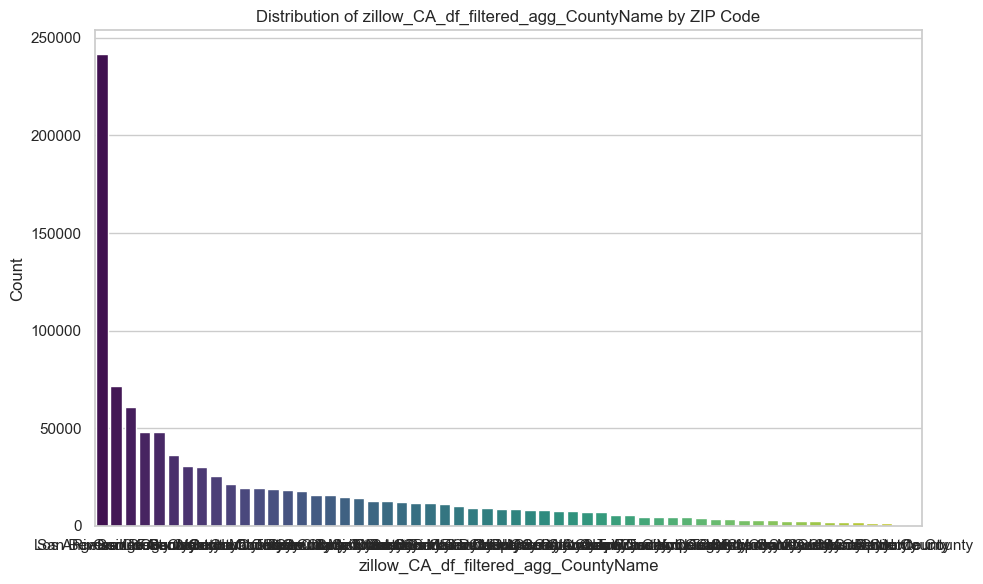

/var/folders/2y/clrtzxvn6c753s49pbsd5t_m0000gn/T/ipykernel_9951/2623890681.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data[variable].value_counts().index, y=data[variable].value_counts().values, palette='viridis')


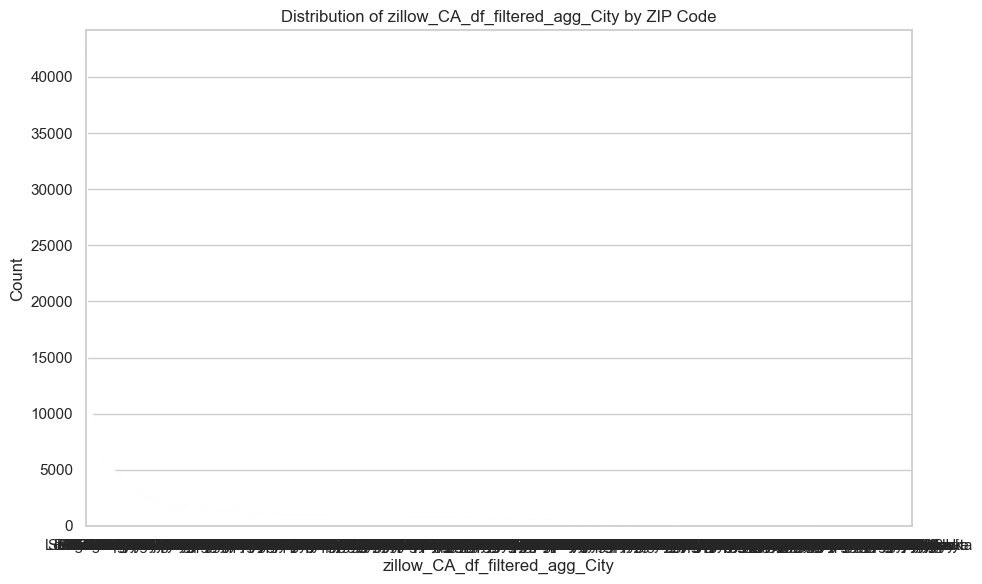

Summary Statistics for Numeric Variables:
            zipcode  percent_white_population_yearly_2017  \
count   2856.000000                           2655.000000   
mean   93450.362045                             64.646591   
std     1768.771926                             13.185247   
min    90001.000000                             42.600000   
25%    92122.750000                             51.800000   
50%    93517.500000                             62.100000   
75%    95121.250000                             75.100000   
max    96162.000000                             96.900000   

       percent_white_population_yearly_2018  \
count                           2655.000000   
mean                              64.256987   
std                               13.406044   
min                               41.500000   
25%                               51.400000   
50%                               61.100000   
75%                               75.800000   
max                             

In [ ]:
# Loading the merged dataframe
merged_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Clean/merged_data.csv')

# Identifying numeric and categorical columns
numeric_cols = merged_df.select_dtypes(include=['number']).columns.tolist()  # Select numeric columns
categorical_cols = merged_df.select_dtypes(include=['object', 'category']).columns.tolist()  # Select categorical columns

# Removing 'zipcode' from numeric columns to avoid duplication error
if 'zipcode' in numeric_cols:
    numeric_cols.remove('zipcode')

# Grouping by 'zipcode' and calculating the mean for numeric columns
grouped_df = merged_df.groupby('zipcode')[numeric_cols].agg('mean').reset_index()

# Univariate analysis for numeric variables
def plot_numeric_distribution(data, variable, color='blue', title=None):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[variable], kde=True, color=color, bins=30, stat='density')
    plt.title(title if title else f'Distribution of {variable} by ZIP Code')
    plt.xlabel(variable)
    plt.ylabel('Density (Normalized Frequency)')
    plt.tight_layout()
    plt.show()

# Plotting numeric variables
for var in numeric_cols:
    plot_numeric_distribution(grouped_df, var, color='blue', title=f'Distribution of {var} by ZIP Code')

# Univariate analysis for categorical variables
def plot_categorical_distribution(data, variable, title=None):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=data[variable].value_counts().index, y=data[variable].value_counts().values, palette='viridis')
    plt.title(title if title else f'Distribution of {variable} by ZIP Code')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Plotting categorical variables
for var in categorical_cols:
    if var != 'zipcode':  # Skip zipcode since it is categorical but not for plotting
        plot_categorical_distribution(merged_df, var, title=f'Distribution of {var} by ZIP Code')

# Summary statistics for numeric variables (mean, std, min, max, etc.)
print("Summary Statistics for Numeric Variables:")
print(grouped_df.describe())

# Summary statistics for categorical variables (counts for each category)
print("\nSummary Counts for Categorical Variables:")
for var in categorical_cols:
    if var != 'zipcode':
        print(f"\n{var} distribution:")
        print(merged_df[var].value_counts())

In [ ]:
def plot_zipcode_facet(data, variable):
    g = sns.FacetGrid(data, col='zipcode', col_wrap=5, height=3)
    g.map(sns.histplot, variable, kde=True)
    g.set_axis_labels(variable, 'Density')
    plt.tight_layout()
    plt.show()

# Plotting insurance premiums by ZIP code in facets
plot_zipcode_facet(grouped_df, 'premiuns_yearly_Earned Premium')


ValueError: Image size of 1500x171600 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x17c0f39c0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 1500x171600 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1500x171600 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x171600 with 2856 Axes>

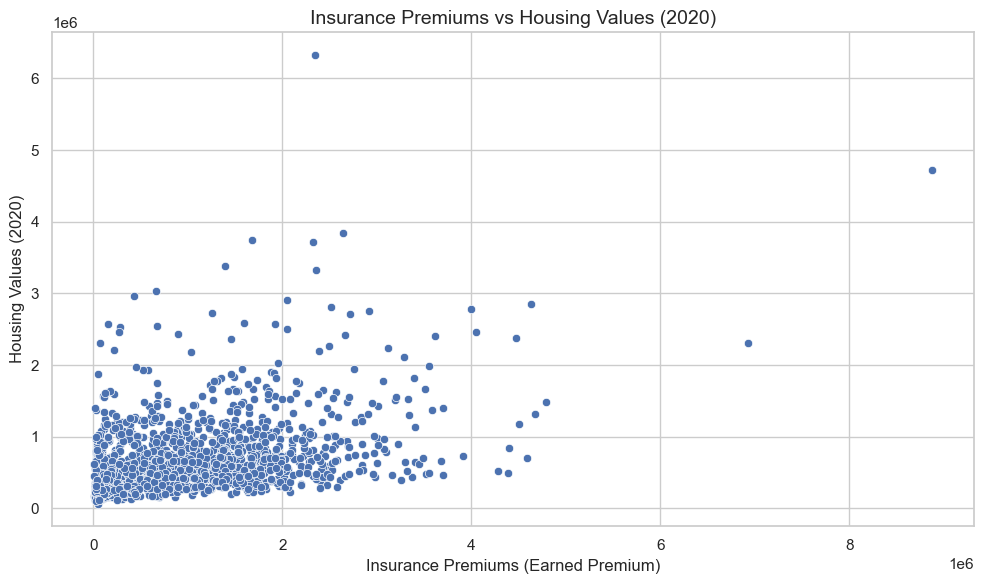

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between Insurance Premiums and Housing Values (2020)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='premiuns_totals_2020', y='zillow_CA_df_filtered_agg_2020', data=grouped_df)
plt.title('Insurance Premiums vs Housing Values (2020)', fontsize=14)
plt.xlabel('Insurance Premiums (Earned Premium)', fontsize=12)
plt.ylabel('Housing Values (2020)', fontsize=12)
plt.tight_layout()
plt.show()

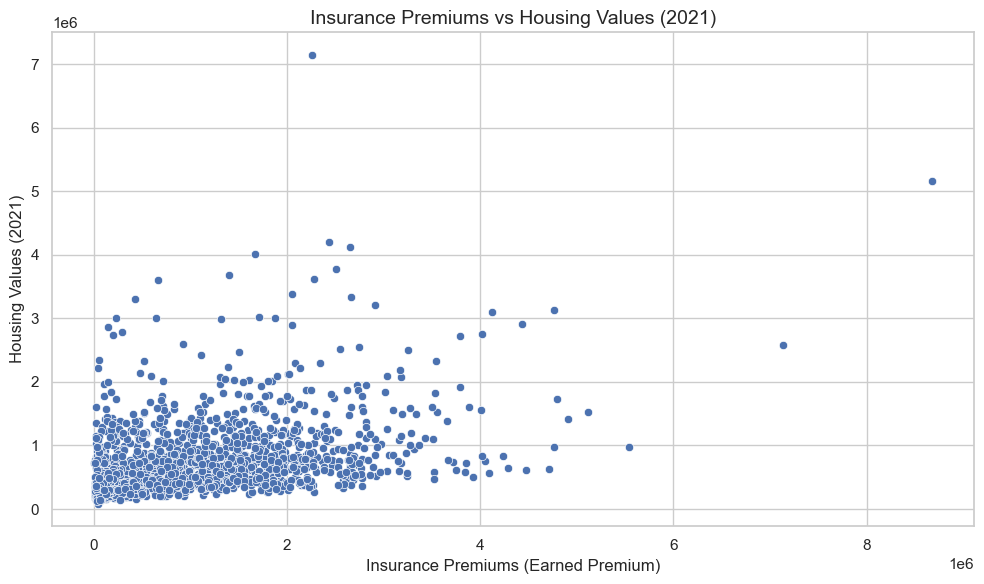

In [ ]:

# Scatter plot between Insurance Premiums and Housing Values (2020)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='premiuns_totals_2021', y='zillow_CA_df_filtered_agg_2021', data=grouped_df)
plt.title('Insurance Premiums vs Housing Values (2021)', fontsize=14)
plt.xlabel('Insurance Premiums (Earned Premium)', fontsize=12)
plt.ylabel('Housing Values (2021)', fontsize=12)
plt.tight_layout()
plt.show()

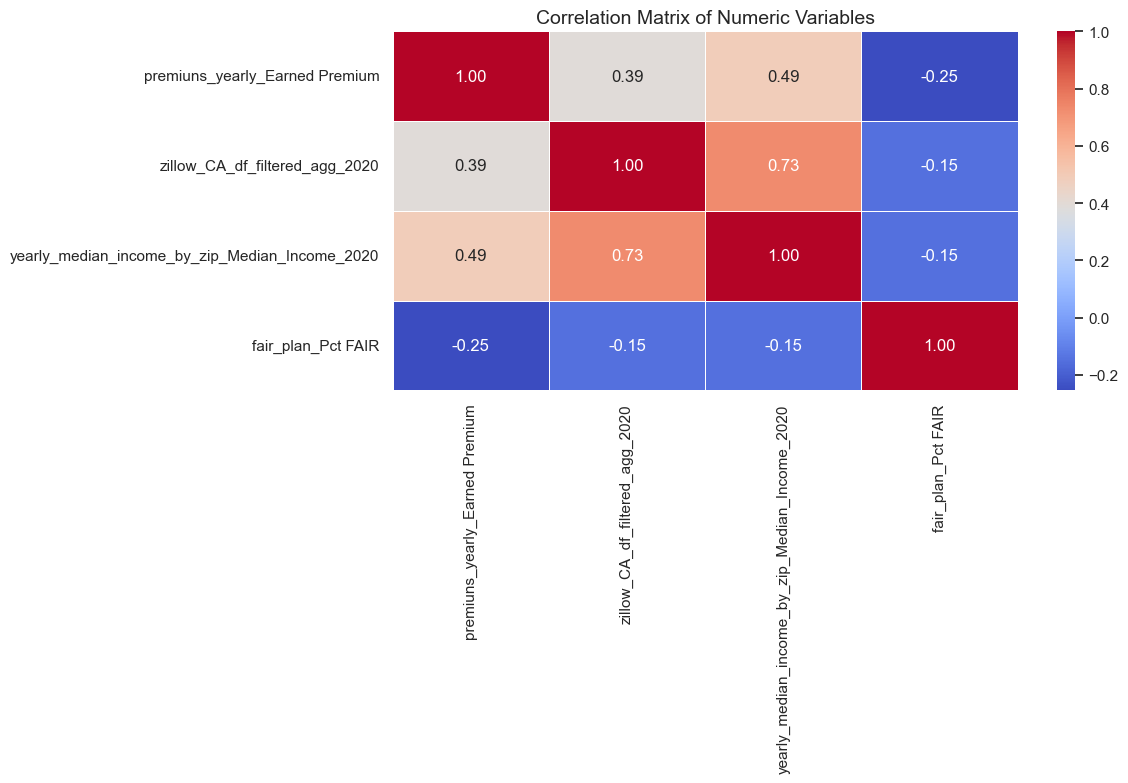

In [ ]:
# List of numerical columns to calculate correlations
numeric_cols = [
    'premiuns_yearly_Earned Premium', 'zillow_CA_df_filtered_agg_2020', 
    'yearly_median_income_by_zip_Median_Income_2020', 'fair_plan_Pct FAIR'
    # Add any other numerical columns you're interested in
]

# Correlation matrix for numerical variables
corr_matrix = grouped_df[numeric_cols].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables', fontsize=14)
plt.tight_layout()
plt.show()


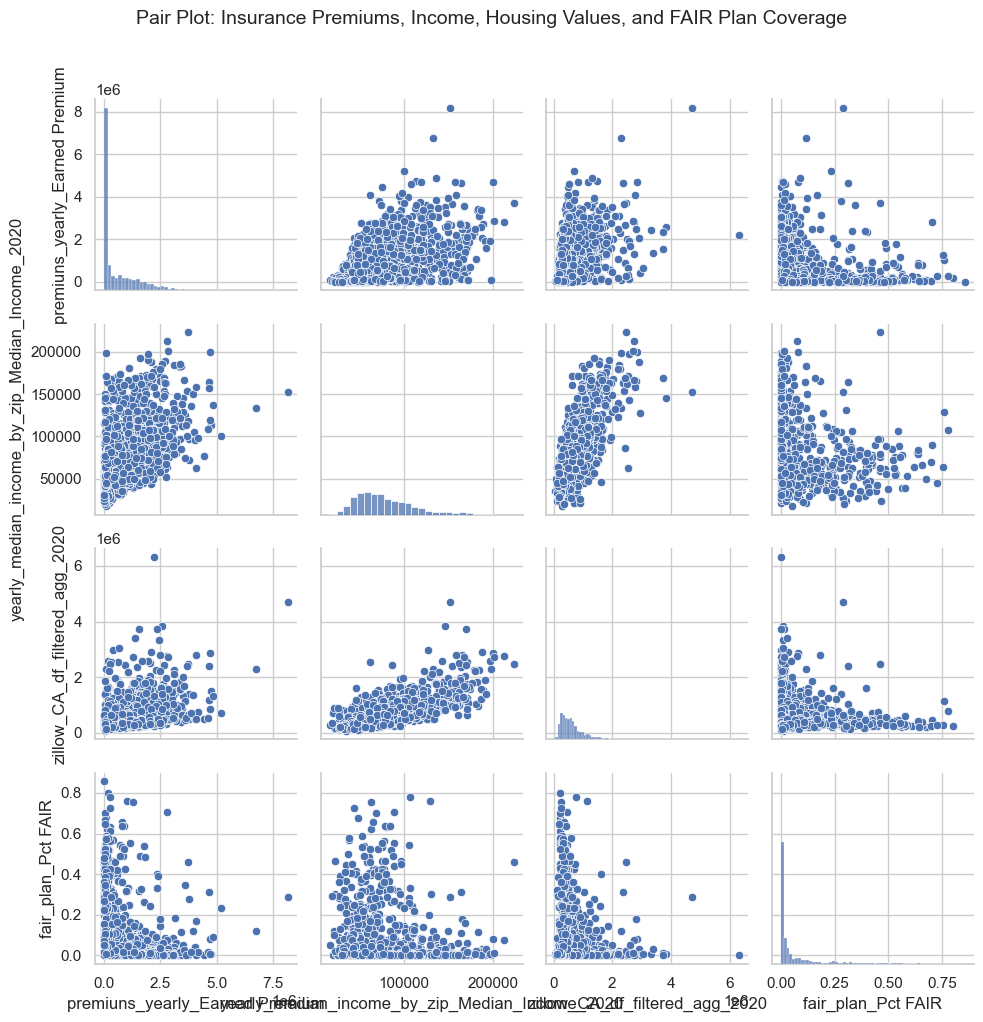

In [ ]:
# Creating pair plot to visualize relationships between Insurance Premiums, Income, Housing Values, and FAIR Plan Coverage
sns.pairplot(grouped_df[['premiuns_yearly_Earned Premium', 
                         'yearly_median_income_by_zip_Median_Income_2020', 
                         'zillow_CA_df_filtered_agg_2020', 
                         'fair_plan_Pct FAIR']])

plt.suptitle('Pair Plot: Insurance Premiums, Income, Housing Values, and FAIR Plan Coverage', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm
import numpy as np

# Cleaning the Data

# Handling missing values
# Dropping rows with missing values in the predictors and target
grouped_df_clean = grouped_df.dropna(subset=['premiuns_yearly_Earned Premium', 
                                              'zillow_CA_df_filtered_agg_2020', 
                                              'yearly_median_income_by_zip_Median_Income_2020', 
                                              'fair_plan_Pct FAIR'])

# Alternatively, could replace missing values with the mean (or median)
# grouped_df_clean = grouped_df.fillna(grouped_df.mean())

# Checking for infinite values
grouped_df_clean = grouped_df_clean[~grouped_df_clean.isin([np.inf, -np.inf]).any(axis=1)]

# Defining independent variables (X) and dependent variable (y)
X = grouped_df_clean[['zillow_CA_df_filtered_agg_2020', 
                      'yearly_median_income_by_zip_Median_Income_2020', 
                      'fair_plan_Pct FAIR']]
y = grouped_df_clean['premiuns_yearly_Earned Premium']

# Adding constant term to the model (for intercept)
X = sm.add_constant(X)

# Fitting the Multiple Linear Regression Model
model = sm.OLS(y, X).fit()

# Viewing the Summary
print(model.summary())


                                  OLS Regression Results                                  
Dep. Variable:     premiuns_yearly_Earned Premium   R-squared:                       0.241
Model:                                        OLS   Adj. R-squared:                  0.239
Method:                             Least Squares   F-statistic:                     149.7
Date:                            Fri, 13 Jun 2025   Prob (F-statistic):           2.87e-84
Time:                                    15:17:23   Log-Likelihood:                -21335.
No. Observations:                            1419   AIC:                         4.268e+04
Df Residuals:                                1415   BIC:                         4.270e+04
Df Model:                                       3                                         
Covariance Type:                        nonrobust                                         
                                                     coef    std err          t      P>|t|

No data found for year 2015. Skipping...
No data found for year 2016. Skipping...
No data found for year 2017. Skipping...
No data found for year 2018. Skipping...
No data found for year 2019. Skipping...


<Figure size 1000x800 with 0 Axes>

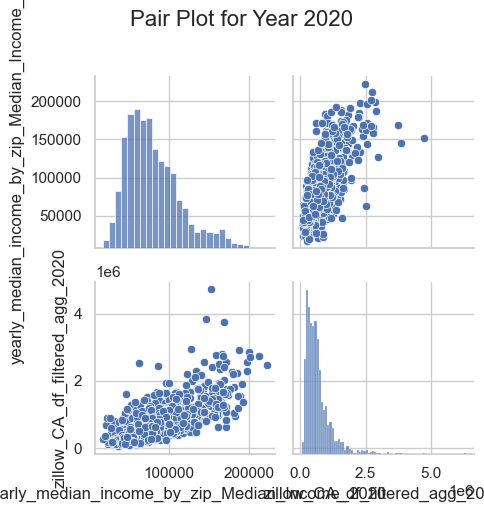

No data found for year 2021. Skipping...
No data found for year 2022. Skipping...
No data found for year 2023. Skipping...


In [ ]:

# Defining a list of years you're interested in
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Definiing the variables to plot for each year
variables = [
    'premiuns_yearly_Earned Premium',  # Insurance premiums
    'yearly_median_income_by_zip_Median_Income_2020',  # Income for 2020
    'fair_plan_Pct FAIR',  # FAIR plan percentage
    'zillow_CA_df_filtered_agg_2020'  # Housing values for 2020
]

# Looping through each year and generate the pair plot
for year in years:
    # Selecting relevant columns for this year
    year_columns = [var for var in variables if f"{year}" in var]
    
    # Checking if we have any columns for the specific year
    if not year_columns:
        print(f"No data found for year {year}. Skipping...")
        continue
    
    # Adding the year to the title and plot the pair plot
    plt.figure(figsize=(10, 8))
    sns.pairplot(grouped_df[year_columns])
    plt.suptitle(f'Pair Plot for Year {year}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


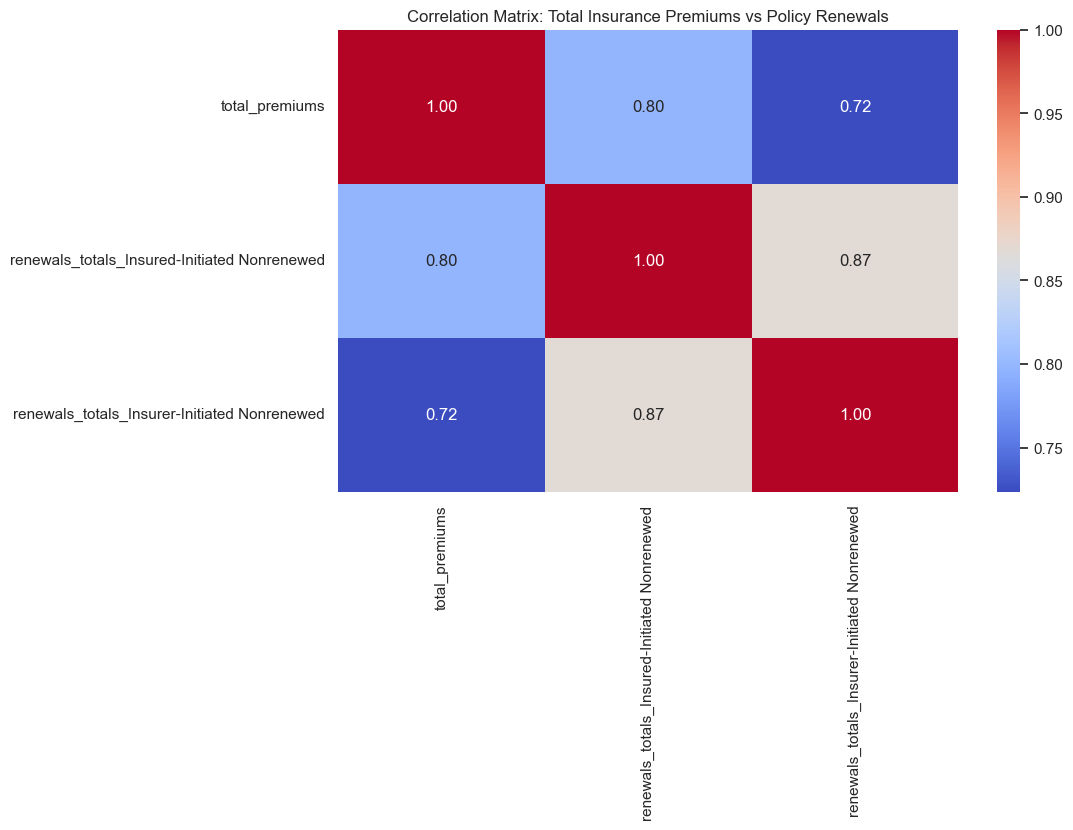

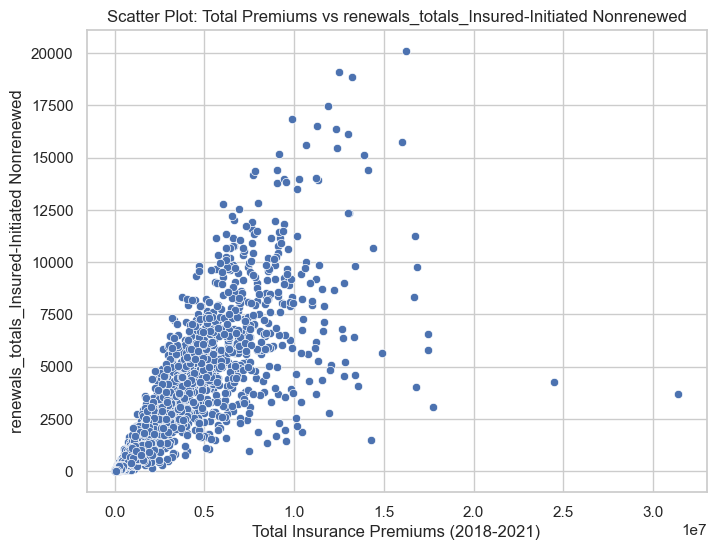

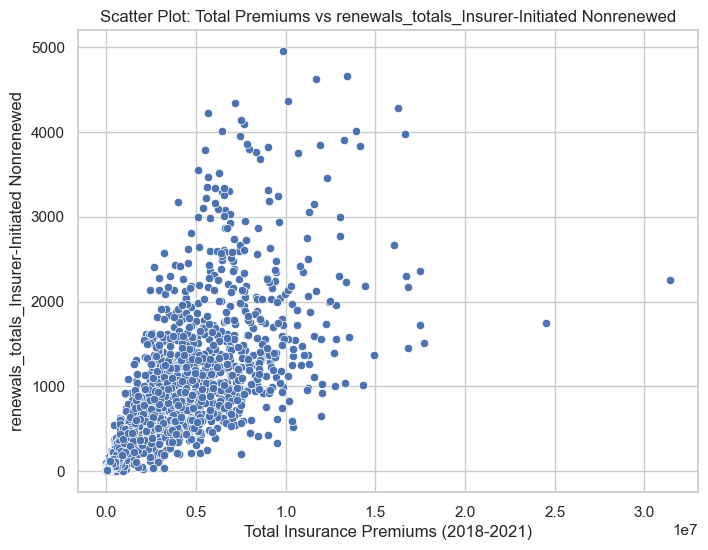

In [ ]:

# Total insurance premiums from 2018 to 2021
premium_columns = [
    'premiuns_totals_2018',
    'premiuns_totals_2019',
    'premiuns_totals_2020',
    'premiuns_totals_2021'
]

# Renewal columns for non-renewals (insurer-initiated and insured-initiated)
renewal_columns = [
    'renewals_totals_Insured-Initiated Nonrenewed',   # Insured non-renewed
    'renewals_totals_Insurer-Initiated Nonrenewed'   # Insurer non-renewed
]

# Summing premiums over the years (2018-2021)
grouped_df['total_premiums'] = grouped_df[premium_columns].sum(axis=1)

# Creating a subset of data for the total premiums and the non-renewal columns
subset_df = grouped_df[['total_premiums'] + renewal_columns].dropna()

# Step 4: Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix: Total Insurance Premiums vs Policy Renewals')
plt.show()

# Visualizing the relationship using scatter plots

# For each renewal column, plot against the total premiums
for renewal_col in renewal_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=subset_df['total_premiums'], y=subset_df[renewal_col])
    plt.title(f'Scatter Plot: Total Premiums vs {renewal_col}')
    plt.xlabel('Total Insurance Premiums (2018-2021)')
    plt.ylabel(renewal_col)
    plt.show()


In [46]:
# Check the first few rows of the dataframe to see the column names
print(grouped_df.columns)


Index(['zipcode', 'percent_white_population_yearly_2017',
       'percent_white_population_yearly_2018',
       'percent_white_population_yearly_2019',
       'percent_white_population_yearly_2020',
       'percent_white_population_yearly_2021',
       'percent_white_population_yearly_2022',
       'percent_white_population_yearly_2023',
       'fair_plan_Voluntary Market Units', 'fair_plan_FAIR Plan Units',
       'fair_plan_Total Ins Units', 'fair_plan_Pct Market',
       'fair_plan_Pct FAIR', 'premiuns_yearly_Year',
       'premiuns_yearly_Earned Premium',
       'yearly_median_income_by_zip_Median_Income_2017',
       'yearly_median_income_by_zip_Median_Income_2018',
       'yearly_median_income_by_zip_Median_Income_2019',
       'yearly_median_income_by_zip_Median_Income_2020',
       'yearly_median_income_by_zip_Median_Income_2021',
       'yearly_median_income_by_zip_Median_Income_2022',
       'yearly_median_income_by_zip_Median_Income_2023',
       'cleaned_climate_disasters_D

In [ ]:
# Manually define column lists based on dataset
premium_columns_yearly = [
    'premiuns_totals_2018', 'premiuns_totals_2019', 'premiuns_totals_2020', 'premiuns_totals_2021'
]

renewal_columns_yearly = [
    'renewals_totals_Insured-Initiated Nonrenewed', 
    'renewals_totals_Insurer-Initiated Nonrenewed'
]

demographics_columns_yearly = [
    'percent_white_population_yearly_2017', 'percent_white_population_yearly_2018', 
    'percent_white_population_yearly_2019', 'percent_white_population_yearly_2020',
    'percent_white_population_yearly_2021', 'percent_white_population_yearly_2022', 
    'percent_white_population_yearly_2023'
]


Valid premium columns: ['premiuns_totals_2018', 'premiuns_totals_2019', 'premiuns_totals_2020', 'premiuns_totals_2021']
Valid renewal columns: ['renewals_totals_Insured-Initiated Nonrenewed', 'renewals_totals_Insurer-Initiated Nonrenewed']
Valid demographics columns: ['percent_white_population_yearly_2018', 'percent_white_population_yearly_2019', 'percent_white_population_yearly_2020', 'percent_white_population_yearly_2021']


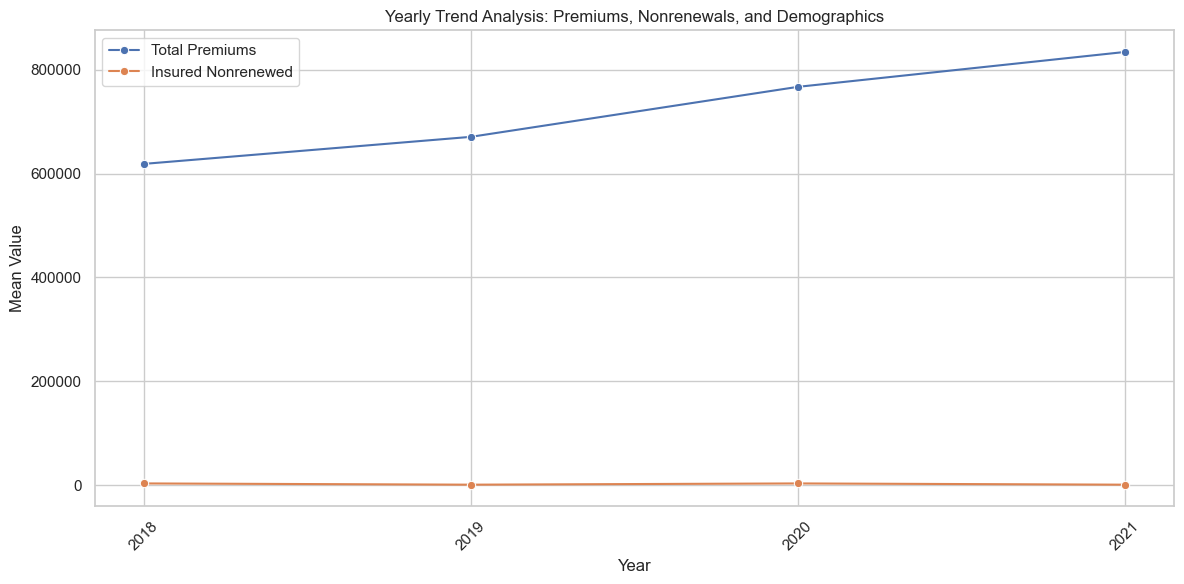

In [ ]:
# Defining columns for premiums, renewals, and demographics for 2018-2021
premium_columns_yearly = [
    'premiuns_totals_2018', 'premiuns_totals_2019', 'premiuns_totals_2020', 'premiuns_totals_2021'
]

renewal_columns_yearly = [
    'renewals_totals_Insured-Initiated Nonrenewed', 
    'renewals_totals_Insurer-Initiated Nonrenewed'
]

# Filtering the demographics columns to only include 2018-2021
demographics_columns_yearly = [
    'percent_white_population_yearly_2018', 
    'percent_white_population_yearly_2019', 
    'percent_white_population_yearly_2020', 
    'percent_white_population_yearly_2021'
]

# Creating lists to store the valid columns after checking existence in the grouped dataframe
valid_premium_columns = []
valid_renewal_columns = []
valid_demographics_columns = []

# Validating columns
for col in premium_columns_yearly:
    if col in grouped_df.columns:
        valid_premium_columns.append(col)

for col in renewal_columns_yearly:
    if col in grouped_df.columns:
        valid_renewal_columns.append(col)

for col in demographics_columns_yearly:
    if col in grouped_df.columns:
        valid_demographics_columns.append(col)

# Print valid columns to confirm
print("Valid premium columns:", valid_premium_columns)
print("Valid renewal columns:", valid_renewal_columns)
print("Valid demographics columns:", valid_demographics_columns)

# Creating a new DataFrame to store yearly trends for easier plotting
yearly_trends = pd.DataFrame({
    'Year': ['2018', '2019', '2020', '2021'],
    'Total Premiums': [
        grouped_df[valid_premium_columns[0]].mean() if len(valid_premium_columns) > 0 else None, 
        grouped_df[valid_premium_columns[1]].mean() if len(valid_premium_columns) > 1 else None,
        grouped_df[valid_premium_columns[2]].mean() if len(valid_premium_columns) > 2 else None,
        grouped_df[valid_premium_columns[3]].mean() if len(valid_premium_columns) > 3 else None
    ],
    'Insured Nonrenewed': [
        grouped_df[valid_renewal_columns[0]].mean() if len(valid_renewal_columns) > 0 else None,
        grouped_df[valid_renewal_columns[1]].mean() if len(valid_renewal_columns) > 1 else None,
        grouped_df[valid_renewal_columns[0]].mean() if len(valid_renewal_columns) > 0 else None,
        grouped_df[valid_renewal_columns[1]].mean() if len(valid_renewal_columns) > 1 else None
    ],
    'Insurer Nonrenewed': [
        grouped_df[valid_renewal_columns[0]].mean() if len(valid_renewal_columns) > 0 else None,
        grouped_df[valid_renewal_columns[1]].mean() if len(valid_renewal_columns) > 1 else None,
        grouped_df[valid_renewal_columns[0]].mean() if len(valid_renewal_columns) > 0 else None,
        grouped_df[valid_renewal_columns[1]].mean() if len(valid_renewal_columns) > 1 else None
    ],
    'White Population %': [
        grouped_df[valid_demographics_columns[0]].mean() if len(valid_demographics_columns) > 0 else None,
        grouped_df[valid_demographics_columns[1]].mean() if len(valid_demographics_columns) > 1 else None,
        grouped_df[valid_demographics_columns[2]].mean() if len(valid_demographics_columns) > 2 else None,
        grouped_df[valid_demographics_columns[3]].mean() if len(valid_demographics_columns) > 3 else None
    ]
})

# Plotting the trends using Seaborn and Matplotlib
plt.figure(figsize=(12, 6))

# Plotting each of the variables
sns.lineplot(x='Year', y='Total Premiums', data=yearly_trends, label='Total Premiums', marker='o')
sns.lineplot(x='Year', y='Insured Nonrenewed', data=yearly_trends, label='Insured Nonrenewed', marker='o')
sns.lineplot(x='Year', y='Insurer Nonrenewed', data=yearly_trends, label='Insurer Nonrenewed', marker='o')
sns.lineplot(x='Year', y='White Population %', data=yearly_trends, label='White Population %', marker='o')

# Customizing the plot
plt.title('Yearly Trend Analysis: Premiums, Nonrenewals, and Demographics')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Showing the plot
plt.show()


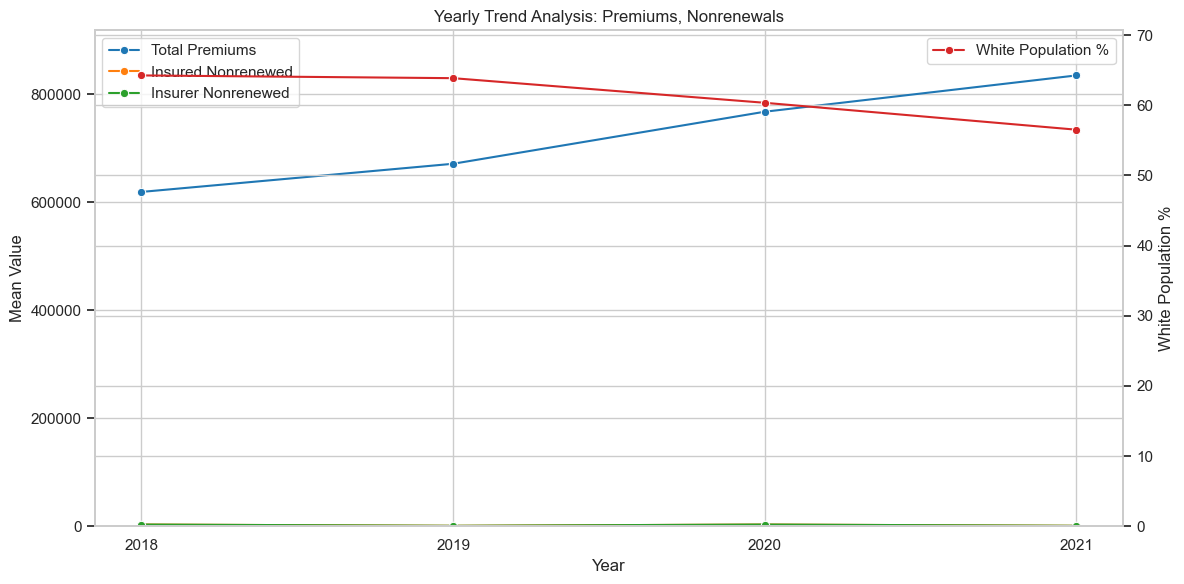

In [ ]:

# Define the dataframe for yearly trends (from the previous code)


plt.figure(figsize=(12, 6))

# Creating a primary axis for Premiums, Insured Nonrenewed, and Insurer Nonrenewed
ax1 = plt.gca()

# Plotting each of the variables on the primary axis (ax1)
sns.lineplot(x='Year', y='Total Premiums', data=yearly_trends, ax=ax1, label='Total Premiums', marker='o', color='tab:blue')
sns.lineplot(x='Year', y='Insured Nonrenewed', data=yearly_trends, ax=ax1, label='Insured Nonrenewed', marker='o', color='tab:orange')
sns.lineplot(x='Year', y='Insurer Nonrenewed', data=yearly_trends, ax=ax1, label='Insurer Nonrenewed', marker='o', color='tab:green')

# Customizing primary axis (ax1) labels and title
ax1.set_title('Yearly Trend Analysis: Premiums, Nonrenewals')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Value')

# Fixing the max value calculation: Find the maximum for each relevant column
ax1.set_ylim(0, max(
    yearly_trends['Total Premiums'].max(),
    yearly_trends['Insured Nonrenewed'].max(),
    yearly_trends['Insurer Nonrenewed'].max()
) * 1.1)  # Scaling by 10% for better visibility

ax1.legend(loc='upper left')

# Creating a secondary axis for White Population % (on the right side)
ax2 = ax1.twinx()

# Plotting White Population % on the secondary axis (ax2)
sns.lineplot(x='Year', y='White Population %', data=yearly_trends, ax=ax2, label='White Population %', marker='o', color='tab:red')

# Customizing secondary axis (ax2)
ax2.set_ylabel('White Population %')
ax2.set_ylim(0, yearly_trends['White Population %'].max() * 1.1)  # Scaling by 10% for better visibility
ax2.legend(loc='upper right')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# The plot
plt.tight_layout()
plt.show()


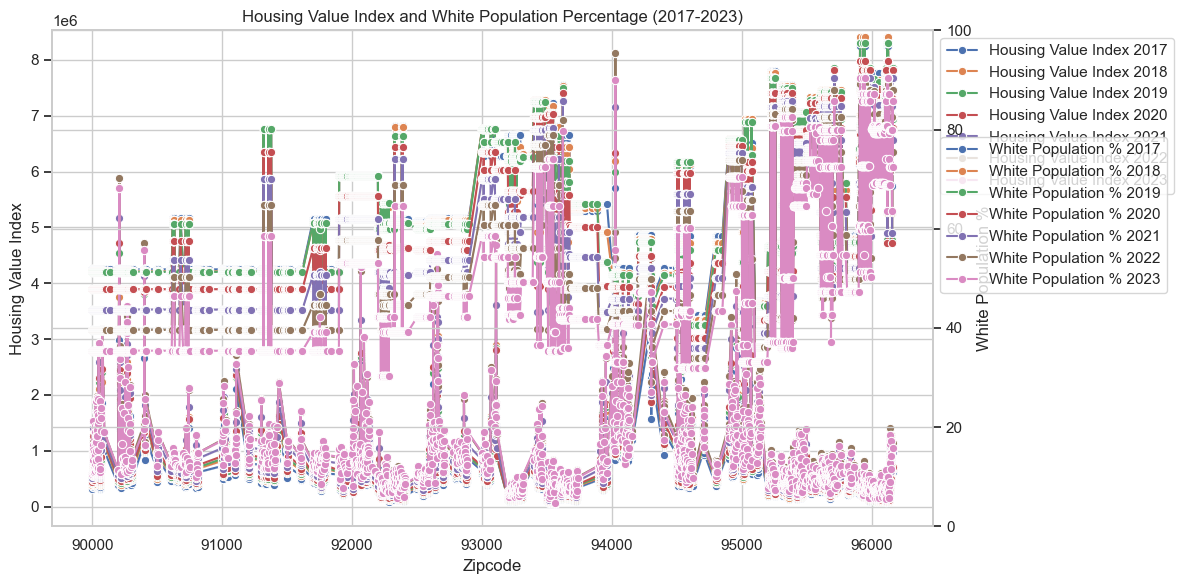

In [ ]:

# Selecting the relevant columns for the plot
housing_columns = ['zillow_CA_df_filtered_agg_2017', 'zillow_CA_df_filtered_agg_2018', 'zillow_CA_df_filtered_agg_2019', 
                   'zillow_CA_df_filtered_agg_2020', 'zillow_CA_df_filtered_agg_2021', 'zillow_CA_df_filtered_agg_2022', 
                   'zillow_CA_df_filtered_agg_2023']

white_population_columns = ['percent_white_population_yearly_2017', 'percent_white_population_yearly_2018', 
                            'percent_white_population_yearly_2019', 'percent_white_population_yearly_2020', 
                            'percent_white_population_yearly_2021', 'percent_white_population_yearly_2022', 
                            'percent_white_population_yearly_2023']

# Plotting for housing value index vs white population percentage
plt.figure(figsize=(12, 6))

# Creating a primary axis for Housing Value Index
ax1 = plt.gca()

# Plot Housing Value Index (y-axis)
for year in range(2017, 2024):
    sns.lineplot(x='zipcode', y=f'zillow_CA_df_filtered_agg_{year}', data=merged_df, ax=ax1, label=f'Housing Value Index {year}', marker='o')

# Customizing the primary axis (ax1) for housing value index
ax1.set_title('Housing Value Index and White Population Percentage (2017-2023)')
ax1.set_xlabel('Zipcode')
ax1.set_ylabel('Housing Value Index')

# Creating a secondary axis for White Population Percentage (on the right side)
ax2 = ax1.twinx()

# Plotting White Population Percentage (y-axis)
for year in range(2017, 2024):
    sns.lineplot(x='zipcode', y=f'percent_white_population_yearly_{year}', data=merged_df, ax=ax2, label=f'White Population % {year}', marker='o')

# Customizing the secondary axis (ax2)
ax2.set_ylabel('White Population %')
ax2.set_ylim(0, 100)  # Ensuring the Y-axis for percentage is between 0 and 100%

# Adding legends to both axes
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(1, 0.8))

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Showing the plot
plt.tight_layout()
plt.show()


In [ ]:
# Calculating Pearson correlation between housing values and white population percentage
correlation = merged_df[housing_columns].corrwith(merged_df[white_population_columns])
print(correlation)


percent_white_population_yearly_2017   NaN
percent_white_population_yearly_2018   NaN
percent_white_population_yearly_2019   NaN
percent_white_population_yearly_2020   NaN
percent_white_population_yearly_2021   NaN
percent_white_population_yearly_2022   NaN
percent_white_population_yearly_2023   NaN
zillow_CA_df_filtered_agg_2017         NaN
zillow_CA_df_filtered_agg_2018         NaN
zillow_CA_df_filtered_agg_2019         NaN
zillow_CA_df_filtered_agg_2020         NaN
zillow_CA_df_filtered_agg_2021         NaN
zillow_CA_df_filtered_agg_2022         NaN
zillow_CA_df_filtered_agg_2023         NaN
dtype: float64


yearly_median_income_by_zip_Median_Income_2017    205235
yearly_median_income_by_zip_Median_Income_2018    205235
yearly_median_income_by_zip_Median_Income_2019    205235
yearly_median_income_by_zip_Median_Income_2020    205235
yearly_median_income_by_zip_Median_Income_2021    205235
renewals_totals_Pct NonRenewed                     90303
renewals_totals_Pct NonRenewed Owner               90303
percent_white_population_yearly_2017                 663
percent_white_population_yearly_2018                 663
percent_white_population_yearly_2019                 663
percent_white_population_yearly_2020                 663
percent_white_population_yearly_2021                 663
dtype: int64
                                                yearly_median_income_by_zip_Median_Income_2017  \
yearly_median_income_by_zip_Median_Income_2017                                        1.000000   
yearly_median_income_by_zip_Median_Income_2018                                        0.989338   
yearly_me

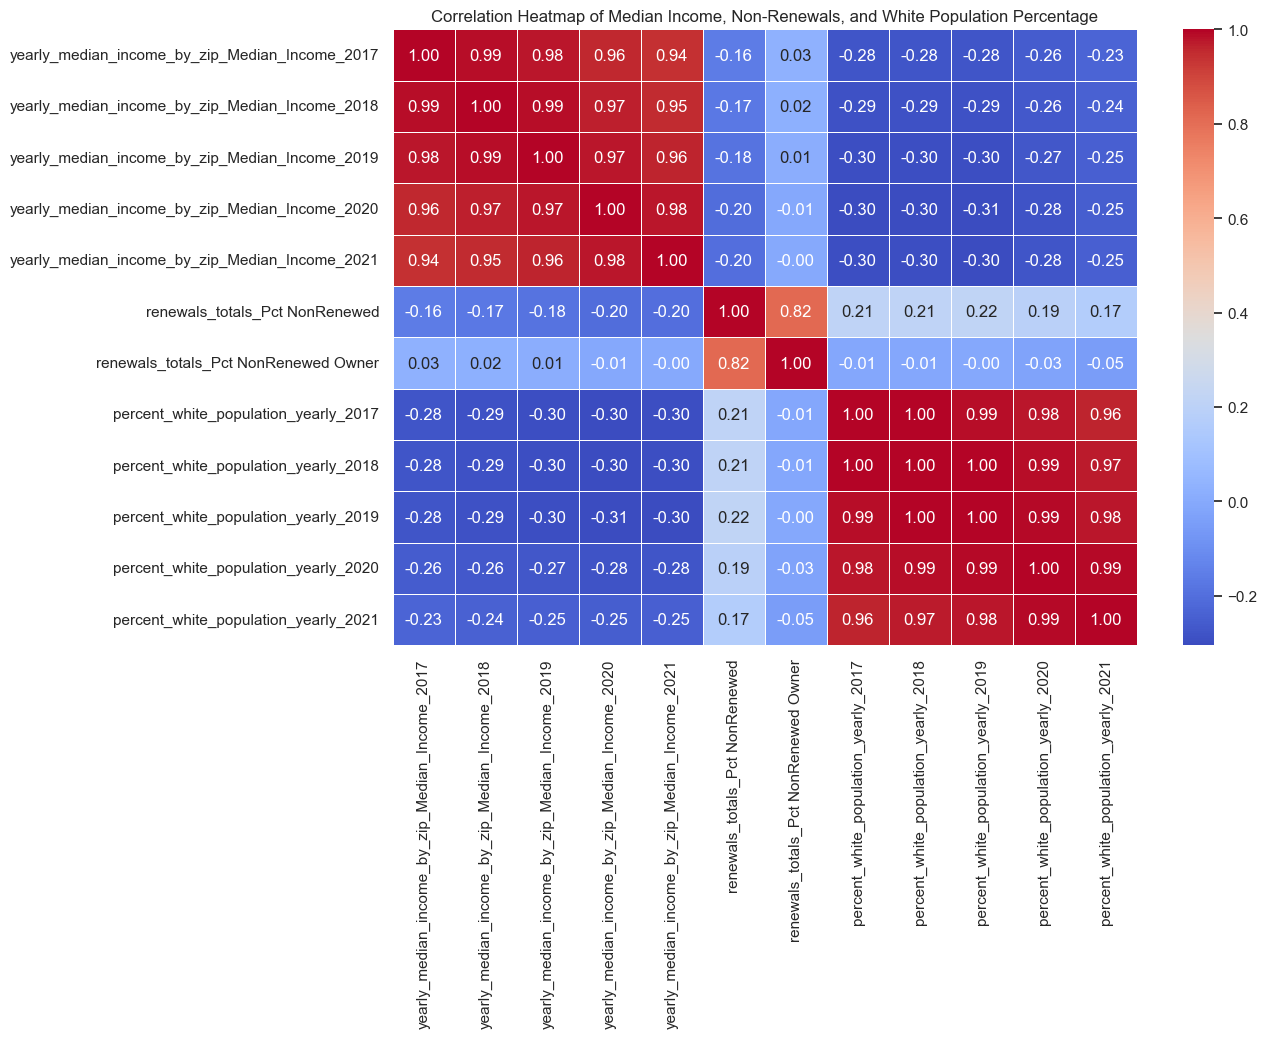

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Columns related to the analysis
income_columns = [ 
                  'yearly_median_income_by_zip_Median_Income_2017', 'yearly_median_income_by_zip_Median_Income_2018', 
                  'yearly_median_income_by_zip_Median_Income_2019', 'yearly_median_income_by_zip_Median_Income_2020', 
                  'yearly_median_income_by_zip_Median_Income_2021']

renewal_columns = ['renewals_totals_Pct NonRenewed', 'renewals_totals_Pct NonRenewed Owner']
white_population_columns = ['percent_white_population_yearly_2017', 'percent_white_population_yearly_2018', 
                            'percent_white_population_yearly_2019', 'percent_white_population_yearly_2020', 
                            'percent_white_population_yearly_2021']

# Selecting the relevant columns for correlation analysis
relevant_columns = income_columns + renewal_columns + white_population_columns

# Subset the dataframe to only include the relevant columns
subset_df = merged_df[relevant_columns]

# Checking for missing values
print(subset_df.isna().sum())

# Dropping rows with missing values for simplicity (you can also fill missing values if needed)
subset_df = subset_df.dropna()

# Correlation analysis between the variables
correlation_matrix = subset_df.corr()

# Printing the correlation matrix
print(correlation_matrix)

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Median Income, Non-Renewals, and White Population Percentage')
plt.show()



                                        aggregate_median_income  \
aggregate_median_income                                1.000000   
aggregate_white_population                            -0.283838   
Pct NonRenewed Owner                                   0.008632   
renewals_totals_Pct NonRenewed Company                -0.329032   

                                        aggregate_white_population  \
aggregate_median_income                                  -0.283838   
aggregate_white_population                                1.000000   
Pct NonRenewed Owner                                     -0.020310   
renewals_totals_Pct NonRenewed Company                    0.366936   

                                        Pct NonRenewed Owner  \
aggregate_median_income                             0.008632   
aggregate_white_population                         -0.020310   
Pct NonRenewed Owner                                1.000000   
renewals_totals_Pct NonRenewed Company              0.180

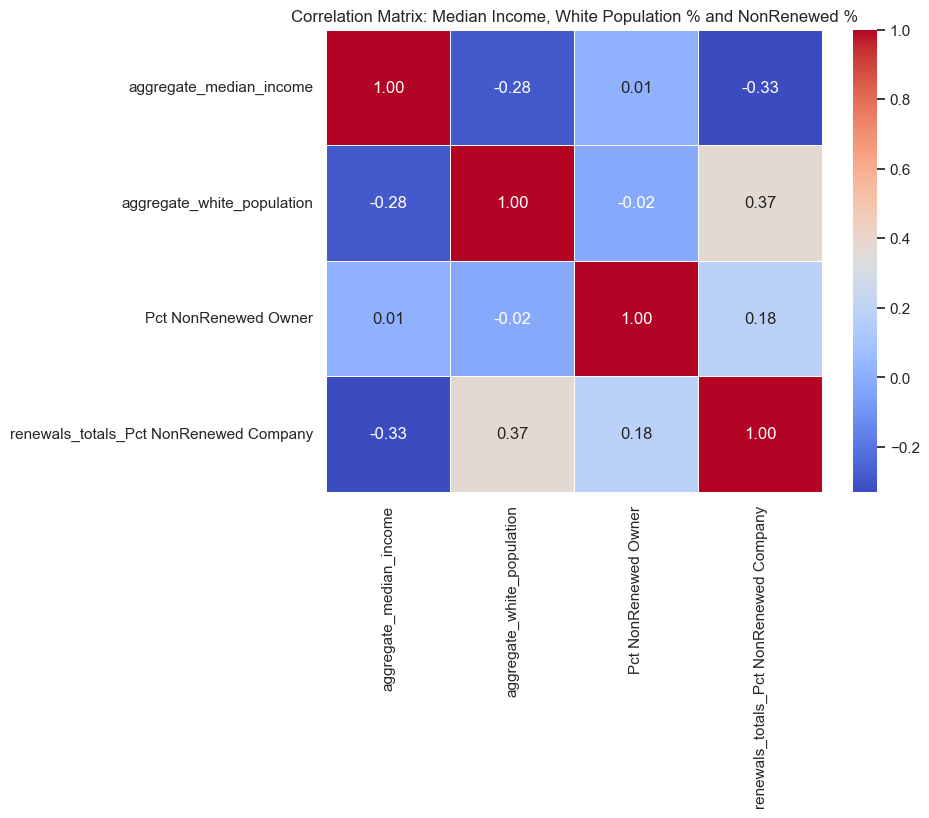

In [ ]:
# Columns related to the analysis
income_columns = [
    'yearly_median_income_by_zip_Median_Income_2017', 
    'yearly_median_income_by_zip_Median_Income_2018', 
    'yearly_median_income_by_zip_Median_Income_2019', 
    'yearly_median_income_by_zip_Median_Income_2020', 
    'yearly_median_income_by_zip_Median_Income_2021'
]

white_population_columns = [
    'percent_white_population_yearly_2017', 
    'percent_white_population_yearly_2018', 
    'percent_white_population_yearly_2019', 
    'percent_white_population_yearly_2020', 
    'percent_white_population_yearly_2021'
]

renewal_columns = [
    # 'renewals_totals_Pct NonRenewed', 
    'renewals_totals_Pct NonRenewed Owner',
    'renewals_totals_Pct NonRenewed Company',
]

# Aggregating the data by taking the mean across the years for median income and white population
agg_income = merged_df[income_columns].mean(axis=1)
agg_white_population = merged_df[white_population_columns].mean(axis=1)

# Selecting the relevant columns for correlation analysis (aggregated income, white population, nonrenewed data)
agg_data = pd.DataFrame({
    'aggregate_median_income': agg_income,
    'aggregate_white_population': agg_white_population,
    # 'Pct NonRenewed': merged_df['renewals_totals_Pct NonRenewed'],
    'Pct NonRenewed Owner': merged_df['renewals_totals_Pct NonRenewed Owner'],
    'renewals_totals_Pct NonRenewed Company' : merged_df['renewals_totals_Pct NonRenewed Company']
})

# Checking for missing values and handle them
agg_data = agg_data.dropna()  # Drop rows with any missing values

# Computing the correlation matrix
correlation_matrix = agg_data.corr()

print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Median Income, White Population % and NonRenewed %')
plt.show()
